# Context

## 

## Research questions
- How has the amount of recycling of waste developed in the EU overall over time?
- How does recycling compare across countries in the EU?
- How does it compare for specific types of waste such as municipal waste, packaging waste, and electrical waste?
- Are there characteristics of countries that could lead to increased recycling?
- How well can the development of the amount of recycling be predicted?

# Analysis

In [7]:
# Importing required libraries
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)  # Add this line
import seaborn as sns


In [8]:
pack_waste = pd.read_csv("data/ten00063_page_linear_2_0.csv", sep=",")
mun_waste = pd.read_csv("data/sdg_11_60_linear_2_0.csv", sep=",")
elect_waste = pd.read_csv("data/cei_wm060_linear_2_0.csv", sep=",")
waste_per_cap = pd.read_csv("data/env_wasmun_linear_2_0.csv", sep=",")
educ = pd.read_csv("data/edat_lfs_9903__custom_19291848_linear_2_0.csv", sep=",")
gdp_per_cap = pd.read_csv("data/gdp-per-capita-worldbank.csv", sep=",")
urban_pop = pd.read_csv("data/share-of-population-urban.csv", sep=",")
waste_expenditure = pd.read_csv("data/IMF_COFOG_GENM_GF0501_WIDEF.csv", sep=",")
pop_density = pd.read_csv("data/tps00003_linear_2_0.csv", sep=",")

# Datasets

**Recycling rates for packaging waste** Dataframe: pack_waste

In [9]:
display(pack_waste)
print(pack_waste.dtypes)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,waste,Waste categories,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),AT,Austria,2012,NaN,65.9,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),AT,Austria,2013,NaN,66.6,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),AT,Austria,2014,NaN,66.6,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),AT,Austria,2015,NaN,67.1,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),AT,Austria,2016,NaN,66.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),SK,Slovakia,2019,NaN,67.5,NaN,NaN,NaN,NaN,NaN
361,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),SK,Slovakia,2020,NaN,70.8,NaN,d,definition differs (see metadata),NaN,NaN
362,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),SK,Slovakia,2021,NaN,73.9,NaN,d,definition differs (see metadata),NaN,NaN
363,dataflow,ESTAT:TEN00063(1.0),Recycling rates for packaging waste,A,Annual,W1501,Packaging,RT_TGT2025,Rate (2025 target and onwards),SK,Slovakia,2022,NaN,71.8,NaN,d,definition differs (see metadata),NaN,NaN


STRUCTURE                                  object
STRUCTURE_ID                               object
STRUCTURE_NAME                             object
freq                                       object
Time frequency                             object
waste                                      object
Waste categories                           object
unit                                       object
Unit of measure                            object
geo                                        object
Geopolitical entity (reporting)            object
TIME_PERIOD                                 int64
Time                                      float64
OBS_VALUE                                 float64
Observation value                         float64
OBS_FLAG                                   object
Observation status (Flag) V2 structure     object
CONF_STATUS                               float64
Confidentiality status (flag)             float64
dtype: object


**Recycling rate of municipal waste** Dataframe: mun_waste

In [10]:
display(mun_waste)
print(mun_waste.dtypes)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,AL,Albania,2020,NaN,18.1,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,AL,Albania,2021,NaN,18.7,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,AL,Albania,2022,NaN,18.9,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,AL,Albania,2023,NaN,18.8,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,AT,Austria,2000,NaN,63.4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,TR,Türkiye,2021,NaN,12.3,NaN,e,estimated,NaN,NaN
774,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,XK,Kosovo*,2020,NaN,0.0,NaN,NaN,NaN,NaN,NaN
775,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,XK,Kosovo*,2021,NaN,2.5,NaN,NaN,NaN,NaN,NaN
776,dataflow,ESTAT:SDG_11_60(1.0),Recycling rate of municipal waste,A,Annual,PC,Percentage,XK,Kosovo*,2022,NaN,2.6,NaN,NaN,NaN,NaN,NaN


STRUCTURE                                  object
STRUCTURE_ID                               object
STRUCTURE_NAME                             object
freq                                       object
Time frequency                             object
unit                                       object
Unit of measure                            object
geo                                        object
Geopolitical entity (reporting)            object
TIME_PERIOD                                 int64
Time                                      float64
OBS_VALUE                                 float64
Observation value                         float64
OBS_FLAG                                   object
Observation status (Flag) V2 structure     object
CONF_STATUS                               float64
Confidentiality status (flag)             float64
dtype: object


**Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected** Dataframe: elect_waste

In [11]:
display(elect_waste)
print(elect_waste.dtypes)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,AT,Austria,2005,NaN,73.1,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,AT,Austria,2006,NaN,79.5,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,AT,Austria,2007,NaN,78.7,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,AT,Austria,2008,NaN,79.7,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,AT,Austria,2009,NaN,79.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,SK,Slovakia,2019,NaN,91.2,NaN,NaN,NaN,NaN,NaN
512,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,SK,Slovakia,2020,NaN,92.6,NaN,NaN,NaN,NaN,NaN
513,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,SK,Slovakia,2021,NaN,92.5,NaN,NaN,NaN,NaN,NaN
514,dataflow,ESTAT:CEI_WM060(1.0),Recycling rate of waste of electrical and elec...,A,Annual,PC,Percentage,SK,Slovakia,2022,NaN,90.9,NaN,NaN,NaN,NaN,NaN


STRUCTURE                                  object
STRUCTURE_ID                               object
STRUCTURE_NAME                             object
freq                                       object
Time frequency                             object
unit                                       object
Unit of measure                            object
geo                                        object
Geopolitical entity (reporting)            object
TIME_PERIOD                                 int64
Time                                      float64
OBS_VALUE                                 float64
Observation value                         float64
OBS_FLAG                                   object
Observation status (Flag) V2 structure     object
CONF_STATUS                               float64
Confidentiality status (flag)             float64
dtype: object


**Municipal waste by waste management operations** Dataframe: waste_per_cap

In [12]:
display(waste_per_cap)
print(waste_per_cap.dtypes)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,wst_oper,Waste management operations,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2013,NaN,29.0,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2014,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2015,NaN,12.0,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2016,NaN,14.0,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,DSP_I,Disposal - incineration (D10),KG_HAB,Kilograms per capita,AL,Albania,2017,NaN,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,TRT,Waste treatment,THS_T,Thousand tonnes,XK,Kosovo*,2019,NaN,451.0,NaN,i,value imputed by Eurostat or other receiving a...,NaN,NaN
17449,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,TRT,Waste treatment,THS_T,Thousand tonnes,XK,Kosovo*,2020,NaN,456.0,NaN,NaN,NaN,NaN,NaN
17450,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,TRT,Waste treatment,THS_T,Thousand tonnes,XK,Kosovo*,2021,NaN,485.0,NaN,NaN,NaN,NaN,NaN
17451,dataflow,ESTAT:ENV_WASMUN(1.0),Municipal waste by waste management operations,A,Annual,TRT,Waste treatment,THS_T,Thousand tonnes,XK,Kosovo*,2022,NaN,501.0,NaN,NaN,NaN,NaN,NaN


STRUCTURE                                  object
STRUCTURE_ID                               object
STRUCTURE_NAME                             object
freq                                       object
Time frequency                             object
wst_oper                                   object
Waste management operations                object
unit                                       object
Unit of measure                            object
geo                                        object
Geopolitical entity (reporting)            object
TIME_PERIOD                                 int64
Time                                      float64
OBS_VALUE                                 float64
Observation value                         float64
OBS_FLAG                                   object
Observation status (Flag) V2 structure     object
CONF_STATUS                               float64
Confidentiality status (flag)             float64
dtype: object


In [13]:
display(educ)
print(educ.dtypes)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,sex,Sex,isced11,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED0-2,...,AT,Austria,2004,NaN,25.1,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED0-2,...,AT,Austria,2005,NaN,24.5,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED0-2,...,AT,Austria,2006,NaN,25.0,NaN,b,break in time series,NaN,NaN
3,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED0-2,...,AT,Austria,2007,NaN,25.4,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED0-2,...,AT,Austria,2008,NaN,24.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED5-8,...,UK,United Kingdom,2015,NaN,37.6,NaN,NaN,NaN,NaN,NaN
3140,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED5-8,...,UK,United Kingdom,2016,NaN,38.3,NaN,NaN,NaN,NaN,NaN
3141,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED5-8,...,UK,United Kingdom,2017,NaN,38.7,NaN,NaN,NaN,NaN,NaN
3142,dataflow,ESTAT:EDAT_LFS_9903(1.0),Population in private households by educationa...,A,Annual,PC,Percentage,T,Total,ED5-8,...,UK,United Kingdom,2018,NaN,39.3,NaN,NaN,NaN,NaN,NaN


STRUCTURE                                                           object
STRUCTURE_ID                                                        object
STRUCTURE_NAME                                                      object
freq                                                                object
Time frequency                                                      object
unit                                                                object
Unit of measure                                                     object
sex                                                                 object
Sex                                                                 object
isced11                                                             object
International Standard Classification of Education (ISCED 2011)     object
age                                                                 object
Age class                                                           object
geo                      

## Dataset Column Overview

| Column Name | Description |
| :--- | :--- |
| **STRUCTURE** | Dataflow definition reference (internal SDMX identifier). |
| **STRUCTURE_ID** | Technical ID of the Data Structure Definition (DSD) used (e.g., `ESTAT:TEN00063(1.0)`). |
| **STRUCTURE_NAME** | Human-readable name of the dataset structure. |
| **freq** | Code indicating the frequency of data collection (e.g., `A` for Annual). |
| **Time frequency** | Textual description of the frequency. |
| **waste** / **wst_oper** | Code identifying the specific waste category (e.g., `PLAS` for Plastic) or waste management operation (e.g., `GEN` for Generated). |
| **Waste categories** / **Waste operations** | Human-readable label for the waste category or operation code. |
| **unit** | Code for the unit of measurement (e.g., `PC` for %, `KG_HAB` for kg per capita). |
| **Unit of measure** | Textual description of the unit of measurement. |
| **geo** | Code representing the geopolitical entity (e.g., `AT`, `DE`, `EU27_2020`). |
| **Geopolitical entity (reporting)** | Full name of the country or region. |
| **TIME_PERIOD** | The reference period for the observation (e.g., `2022`). |
| **Time** | Textual representation of the reference period. |
| **OBS_VALUE** | The actual statistical value/measurement. |
| **Observation value** | Duplicate representation of the statistical value. |
| **OBS_FLAG** | Single-character code indicating data quality or status (e.g., `b` = break in time series, `e` = estimated). |
| **Observation status** | Textual description of the observation flag. |
| **CONF_STATUS** | Code indicating the confidentiality status of the observation. |
| **Confidentiality status** | Textual description of the confidentiality status. |

**Sources:**
*   [Eurostat Metadata > Code lists (Official)](https://ec.europa.eu/eurostat/web/metadata/code-lists)
*   [Eurostat SDMX InfoSpace (Standards)](https://ec.europa.eu/eurostat/web/sdmx-infospace/welcome)
*   [Eurostat API User Guide (Data Structure)](https://ec.europa.eu/eurostat/web/user-guides/data-browser/api-data-access/api-introduction)

## Filter for Current EU Member States (EU27_2020)

For all core analyses, only the **current 27 EU member states (EU27_2020)** are included. This ensures consistency with the official Eurostat aggregate `EU27_2020` and avoids mixing in candidate, EFTA or former member states.

The following countries are retained in the datasets:

`['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']` [web:146][web:151]


In [14]:

eu_countries_map = {
    'EU27_2020': 'European Union - 27 countries (from 2020)',
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'EL': 'Greece',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden'
}

def filter_to_eu27(df, name="Dataset"):
    """
    Filters the dataframe to keep only the 27 current EU member states AND the EU27_2020 aggregate.
    Prints statistics and explicitly lists the countries/codes that were removed.
    """
    initial_rows = len(df)
    
    # 1. Identify what is currently in the dataframe
    current_geo = set(df['geo'].unique())
    
    # 2. Identify valid keys (EU countries + EU Aggregate)
    valid_geo = set(eu_countries_map.keys())
    
    # 3. Calculate the difference (What will be removed?)
    removed_geo = current_geo - valid_geo
    
    # 4. Filter: Keep rows where 'geo' is in our valid keys
    df_filtered = df[df['geo'].isin(valid_geo)].copy()
    
    removed_rows = initial_rows - len(df_filtered)
    
    print(f"[{name}] Filtered to EU-27 + Aggregate:")
    print(f"   - Kept: {len(df_filtered)} rows")
    print(f"   - Removed: {removed_rows} rows")
    
    if removed_geo:
        # Sort list for better readability
        print(f"   - Removed Countries/Aggregates: {sorted(list(removed_geo))}")
    else:
        print(f"   - No countries removed (Dataset matched requirements exactly).")
    
    print("-" * 40) # Separator line
    
    return df_filtered


In [15]:
# 1. Packaging Waste
pack_waste = filter_to_eu27(pack_waste, "Packaging Waste")

# 2. Municipal Waste
mun_waste = filter_to_eu27(mun_waste, "Municipal Waste")

# 3. E-Waste
elect_waste = filter_to_eu27(elect_waste, "E-Waste")

# 4. Waste Per Capita
waste_per_cap = filter_to_eu27(waste_per_cap, "Waste Per Capita")

# 5. Education
educ = filter_to_eu27(educ, "Education")

print("\nAll datasets restricted to EU-27 countries.")

[Packaging Waste] Filtered to EU-27 + Aggregate:
   - Kept: 329 rows
   - Removed: 36 rows
   - Removed Countries/Aggregates: ['IS', 'LI', 'NO']
----------------------------------------
[Municipal Waste] Filtered to EU-27 + Aggregate:
   - Kept: 658 rows
   - Removed: 120 rows
   - Removed Countries/Aggregates: ['AL', 'BA', 'CH', 'IS', 'ME', 'MK', 'NO', 'RS', 'TR', 'XK']
----------------------------------------
[E-Waste] Filtered to EU-27 + Aggregate:
   - Kept: 470 rows
   - Removed: 46 rows
   - Removed Countries/Aggregates: ['IS', 'LI', 'NO']
----------------------------------------
[Waste Per Capita] Filtered to EU-27 + Aggregate:
   - Kept: 14349 rows
   - Removed: 3104 rows
   - Removed Countries/Aggregates: ['AL', 'BA', 'CH', 'IS', 'ME', 'MK', 'NO', 'RS', 'TR', 'XK']
----------------------------------------
[Education] Filtered to EU-27 + Aggregate:
   - Kept: 2464 rows
   - Removed: 680 rows
   - Removed Countries/Aggregates: ['BA', 'CH', 'EA20', 'IS', 'ME', 'MK', 'NO', 'RS', '

## General function to drop columns

In [16]:
def drop_columns_if_exist(dfs, columns_to_drop, verbose=True):
    """
    Drops a specific list of columns from a list of dataframes if they exist.
    """
    if verbose:
        print(f"--- Dropping {len(columns_to_drop)} specific columns ---")
    
    for i, df in enumerate(dfs):
        # Find intersection: which columns to drop are actually in this df?
        cols_in_df = [c for c in df.columns if c in columns_to_drop]
        
        if cols_in_df:
            df.drop(columns=cols_in_df, inplace=True)
            if verbose:
                print(f"[Dataset {i+1}] Dropped {len(cols_in_df)} columns: {cols_in_df}")
        else:
            if verbose:
                print(f"[Dataset {i+1}] No matching columns found.")

## Cleaning Eurostats Datasets
- **Drop** emtpty columns
- **Drop** redundant columns

In [17]:
def drop_fully_empty_columns(df, verbose=True):
    """
    Remove all columns that contain only NaN values.
    """
    empty_cols = df.columns[df.isna().all()].tolist()
    
    if verbose and empty_cols:
        print("Dropping fully empty columns:", empty_cols)
    elif verbose:
        print("No fully empty columns found.")
    
    return df.drop(columns=empty_cols)

In [18]:
# Apply functions to remove empty columns.
pack_waste = drop_fully_empty_columns(pack_waste)
mun_waste = drop_fully_empty_columns(mun_waste)
elect_waste = drop_fully_empty_columns(elect_waste)
waste_per_cap = drop_fully_empty_columns(waste_per_cap)
educ = drop_fully_empty_columns(educ)


Dropping fully empty columns: ['Time', 'Observation value', 'CONF_STATUS', 'Confidentiality status (flag)']
Dropping fully empty columns: ['Time', 'Observation value', 'CONF_STATUS', 'Confidentiality status (flag)']
Dropping fully empty columns: ['Time', 'Observation value', 'CONF_STATUS', 'Confidentiality status (flag)']
Dropping fully empty columns: ['Time', 'Observation value', 'CONF_STATUS', 'Confidentiality status (flag)']
Dropping fully empty columns: ['Time', 'Observation value', 'CONF_STATUS', 'Confidentiality status (flag)']


**Drop** **columns** which are globally contant over all datasets.

In [19]:
def drop_global_constant_columns(dfs):
    """
    Identifies and drops columns that exist in ALL dataframes AND have the 
    exact same single constant value across ALL dataframes.
    Returns a dictionary of {column: constant_value} for documentation.
    """
    # 1. Identify columns present in ALL dataframes
    if not dfs:
        return {}
        
    common_cols = set(dfs[0].columns)
    for df in dfs[1:]:
        common_cols.intersection_update(df.columns)
    
    global_constants = {}
    
    # 2. Check which of these common columns are globally constant
    for col in list(common_cols):
        unique_vals = set()
        is_constant_everywhere = True
        
        for df in dfs:
            # Get unique values for this column in this dataframe
            vals = df[col].unique()
            
            # If a dataframe has more than 1 value (or 0), it's not constant within itself
            if len(vals) != 1:
                is_constant_everywhere = False
                break
            
            unique_vals.add(vals[0])
            
        # 3. Check if the value is the same across all dataframes (set length must be 1)
        if is_constant_everywhere and len(unique_vals) == 1:
            global_constants[col] = unique_vals.pop()

    # 4. Drop these columns from all dataframes
    if global_constants:
        print(f"Dropping {len(global_constants)} globally constant columns:")
        for col, val in global_constants.items():
            print(f"  - '{col}': '{val}'")
            for df in dfs:
                df.drop(columns=[col], inplace=True)
    else:
        print("No globally constant columns found.")
        
    return global_constants



In [20]:
all_dfs = [pack_waste, mun_waste, elect_waste, waste_per_cap, educ]
dropped_info = drop_global_constant_columns(all_dfs)

Dropping 3 globally constant columns:
  - 'freq': 'A'
  - 'Time frequency': 'Annual'
  - 'STRUCTURE': 'dataflow'


Dropped 3 globally constant columns (these values are not any more relvant as they have across the datasets the same value):
  - **freq**: A
  - **Time frequency**: Annual
  - **STRUCTURE**: dataflow

### Data Dictionary & Legend Extraction

The datasets contain redundant column pairs: a short **Code** (e.g., 'AT', 'b') and a long **Label** (e.g., 'Austria', 'break in time series'). 

To keep the datasets clean and efficient, we will:
1.  **Extract the mappings** (Legend) between Codes and Labels programmatically.
2.  **Store/Print these legends** for our final report.
3.  **Drop the redundant Label columns** in the next step to reduce file size and complexity.

**Redundant Pairs identified:**
* `geo` (Code) $\leftrightarrow$ `Geopolitical entity (reporting)` (Label)
* `unit` (Code) $\leftrightarrow$ `Unit of measure` (Label)
* `waste` / `wst_oper` (Code) $\leftrightarrow$ `Waste categories` / `Management operations` (Label)
* `OBS_FLAG` (Code) $\leftrightarrow$ `Observation status` (Label)

In [21]:
def extract_and_print_combined_legend(dfs):
    """
    Iterates through ALL dataframes, collects unique code-description pairs 
    across all of them, and prints a single consolidated legend.
    """
    # Define the known pairs (Code : Description Column)
    known_pairs = {
        'OBS_FLAG': 'Observation status (Flag) V2 structure',
        'unit': 'Unit of measure',
        'waste': 'Waste categories',
        'wst_oper': 'Waste management operations',
        'geo': 'Geopolitical entity (reporting)',
        'STRUCTURE_ID':	'STRUCTURE_NAME'
        
    }

    # Dictionary to store unique pairs for each category
    # Structure: {'OBS_FLAG': {('b', 'break in series'), ...}, ...}
    combined_legends = {key: set() for key in known_pairs}

    # 1. Collect all pairs from all dataframes
    for df in dfs:
        for code_col, desc_col in known_pairs.items():
            if code_col in df.columns and desc_col in df.columns:
                # Get unique pairs from this specific dataframe
                pairs = df[[code_col, desc_col]].dropna(subset=[code_col]).drop_duplicates()
                
                # Add to our master set
                for _, row in pairs.iterrows():
                    combined_legends[code_col].add((row[code_col], row[desc_col]))

    # 2. Print the consolidated legend
    print("=== COMBINED DATASET LEGEND (ALL DATASETS) ===\n")
    
    for category, pairs in combined_legends.items():
        if pairs:
            print(f"[{category}]")
            # Sort by code (first element of tuple) for readability
            sorted_pairs = sorted(list(pairs), key=lambda x: x[0])
            
            for code, desc in sorted_pairs:
                print(f"  {code} : {desc}")
            print() # Empty line between categories



In [22]:
current_dfs = [pack_waste, mun_waste, elect_waste, waste_per_cap, educ]
extract_and_print_combined_legend(current_dfs)

=== COMBINED DATASET LEGEND (ALL DATASETS) ===

[OBS_FLAG]
  b : break in time series
  bd : break in time series, definition differs (see metadata)
  be : break in time series, estimated
  bep : break in time series, estimated, provisional
  bi : break in time series, value imputed by Eurostat or other receiving agencies
  bu : break in time series, low reliability
  d : definition differs (see metadata)
  dp : definition differs (see metadata), provisional
  e : estimated
  ep : estimated, provisional
  i : value imputed by Eurostat or other receiving agencies
  p : provisional
  u : low reliability

[unit]
  KG_HAB : Kilograms per capita
  PC : Percentage
  RT_TGT2025 : Rate (2025 target and onwards)
  THS_T : Thousand tonnes

[waste]
  W1501 : Packaging

[wst_oper]
  DSP_I : Disposal - incineration (D10)
  DSP_I_RCV_E : Disposal - incineration (D10) and recovery - energy recovery (R1)
  DSP_L_OTH : Disposal - landfill and other (D1-D7, D12)
  GEN : Waste generated
  PRP_REU : Prepa

### Data Dictionary & Legend

The following tables serve as a legend mapping the short codes (kept in the dataset) to their original descriptions (removed to optimize performance).

#### **OBS_FLAG (Observation Status)**
Mapping between column `OBS_FLAG` and `Observation status (Flag) V2 structure`, plus official Eurostat explanations.

| OBS_FLAG | Observation status (Flag) V2 structure | Explanation (Eurostat Metadata) |
| :--- | :--- | :--- |
| **NaN** | (No flag) | Regular measured value with no special condition. |
| **b** | break in time series | Methodological change affecting comparability across years. |
| **bd** | break in time series, definition differs (see metadata) | Both a methodological break and differing definition apply. |
| **be** | break in time series, estimated | Value is estimated and affected by a methodological break. |
| **bep** | break in time series, estimated, provisional | Multiple limitations combined (Break + Est + Prov). |
| **bi** | break in series & imputed | Value was imputed and has a methodological break. |
| **d** | definition differs (see metadata) | Value is based on a different national methodology or definition. |
| **dp** | definition differs (see metadata), provisional | Differing definition and provisional status combined. |
| **e** | estimated | Value is an estimate rather than a directly observed figure. |
| **ep** | estimated, provisional | Value is both estimated and preliminary. |
| **i** | value imputed by Eurostat... | Value filled in/corrected by Eurostat due to missing data. |
| **p** | provisional | Value is preliminary and may be revised later. |

<br>

**Source of the official explanation:**  
Eurostat Observation Status (Flag) V2 Codelist  
https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/OBS_FLAG

#### **Units**
Mapping between column `unit` and `Unit of measure`.

| unit | Unit of measure |
| :--- | :--- |
| **KG_HAB** | Kilograms per capita |
| **PC** | Percentage |
| **RT_TGT2025** | Rate (2025 target and onwards) |
| **THS_T** | Thousand tonnes |

#### **Waste Categories (Type of Waste)**
Mapping between column `waste` and `Waste categories`.

| waste | Waste categories |
| :--- | :--- |
| **W1501** | Packaging |

#### **Waste Management Operations (Process)**
Mapping between column `wst_oper` and `Waste management operations`.

| wst_oper | Waste management operations |
| :--- | :--- |
| **GEN** | Waste generated |
| **RCY** | Recycling |
| **RCY_M** | Recycling - material |
| **RCY_C_D** | Recycling - composting and digestion |
| **DSP_I** | Disposal - incineration (D10) |
| **DSP_I_RCV_E** | Disposal - incineration (D10) and energy recovery (R1) |
| **DSP_L_OTH** | Disposal - landfill and other (D1-D7, D12) |
| **PRP_REU** | Preparing for reuse |
| **RCV_E** | Recovery - energy recovery (R1) |
| **TRT** | Waste treatment |
#### **Geopolitical Entity (Countries)**
Mapping between column `geo` and `Geopolitical entity (reporting)`.

| geo | Geopolitical entity (reporting) |
| :--- | :--- |
| **AT** | Austria |
| **BE** | Belgium |
| **BG** | Bulgaria |
| **CH** | Switzerland |
| **CY** | Cyprus |
| **CZ** | Czechia |
| **DE** | Germany |
| **DK** | Denmark |
| **EE** | Estonia |
| **EL** | Greece |
| **ES** | Spain |
| **EU27_2020** | European Union - 27 countries (from 2020) |
| **FI** | Finland |
| **FR** | France |
| **HR** | Croatia |
| **HU** | Hungary |
| **IE** | Ireland |
| **IS** | Iceland |
| **IT** | Italy |
| **LT** | Lithuania |
| **LU** | Luxembourg |
| **LV** | Latvia |
| **MT** | Malta |
| **NL** | Netherlands |
| **NO** | Norway |
| **PL** | Poland |
| **PT** | Portugal |
| **RO** | Romania |
| **SE** | Sweden |
| **SI** | Slovenia |
| **SK** | Slovakia |
| **TR** | Türkiye |
| **XK** | Kosovo* |
| **BA** | Bosnia and Herzegovina |
| **ME** | Montenegro |
| **MK** | North Macedonia |
| **RS** | Serbia |

#### **International Standard Classification of Education (ISCED 2011)**
Mapping between column `isced11` and `International Standard Classification of Education (ISCED 2011)`.

| isced11 | International Standard Classification of Education (ISCED 2011) |
| :--- | :--- |
| **ED0-2** | Less than primary, primary and lower secondary education (levels 0-2) |
| **ED3_4** | Upper secondary and post-secondary non-tertiary education (levels 3 and 4) |
| **ED3_4GEN** | Upper secondary and post-secondary non-tertiary education (levels 3 and 4) - general |
| **ED3-8**| Upper secondary, post-secondary non-tertiary and tertiary education (levels 3-8) |
| **ED5-8**| Tertiary education (levels 5-8) |

#### **Dataset Structure IDs**
Mapping between column `STRUCTURE_ID` and the official dataset name (`STRUCTURE_NAME`).

| STRUCTURE_ID | STRUCTURE_NAME (Dataset) |
| :--- | :--- |
| **ESTAT:CEI_WM060(1.0)** | Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected |
| **ESTAT:ENV_WASMUN(1.0)** | Municipal waste by waste management operations |
| **ESTAT:SDG_11_60(1.0)** | Recycling rate of municipal waste |
| **ESTAT:TEN00063(1.0)** | Recycling rates for packaging waste |

In [23]:
# 1. List of Dataframes
all_dfs = [pack_waste, mun_waste, elect_waste, waste_per_cap, educ]

# 2. List of columns strictly corresponding to the Legend created above
cols_to_remove_legend = [
    'Geopolitical entity (reporting)',          # Mapped to 'geo'
    'Unit of measure',                          # Mapped to 'unit'
    'Waste categories',                         # Mapped to 'waste'
    'Waste management operations',              # Mapped to 'wst_oper'
    'Observation status (Flag) V2 structure',    # Mapped to 'OBS_FLAG'
    'STRUCTURE_NAME',                           # Mapped to 'STRUCTURE_ID'
    'International Standard Classification of Education (ISCED 2011)' # Mapped to 'isced11'
]

# 3. Execute Drop
drop_columns_if_exist(all_dfs, cols_to_remove_legend)

--- Dropping 7 specific columns ---
[Dataset 1] Dropped 5 columns: ['STRUCTURE_NAME', 'Waste categories', 'Unit of measure', 'Geopolitical entity (reporting)', 'Observation status (Flag) V2 structure']
[Dataset 2] Dropped 4 columns: ['STRUCTURE_NAME', 'Unit of measure', 'Geopolitical entity (reporting)', 'Observation status (Flag) V2 structure']
[Dataset 3] Dropped 4 columns: ['STRUCTURE_NAME', 'Unit of measure', 'Geopolitical entity (reporting)', 'Observation status (Flag) V2 structure']
[Dataset 4] Dropped 5 columns: ['STRUCTURE_NAME', 'Waste management operations', 'Unit of measure', 'Geopolitical entity (reporting)', 'Observation status (Flag) V2 structure']
[Dataset 5] Dropped 5 columns: ['STRUCTURE_NAME', 'Unit of measure', 'International Standard Classification of Education (ISCED 2011)', 'Geopolitical entity (reporting)', 'Observation status (Flag) V2 structure']


### Drop STRUCTURE_ID

**STRUCTURE_ID** (along with `STRUCTURE` and `STRUCTURE_NAME`) represents internal technical metadata used by Eurostat's database system (SDMX identifiers). These columns provide no additional analytical value, they are constant within each dataset and are removed to reduce redundancy and keep the dataframes clean.

In [24]:
# 1. List of Dataframes
all_dfs = [pack_waste, mun_waste, elect_waste, waste_per_cap, educ]

# 2. List of columns strictly corresponding to the Legend created above
cols_to_remove_legend = [
    'STRUCTURE_ID'
]

# 3. Execute Drop
drop_columns_if_exist(all_dfs, cols_to_remove_legend)

--- Dropping 1 specific columns ---
[Dataset 1] Dropped 1 columns: ['STRUCTURE_ID']
[Dataset 2] Dropped 1 columns: ['STRUCTURE_ID']
[Dataset 3] Dropped 1 columns: ['STRUCTURE_ID']
[Dataset 4] Dropped 1 columns: ['STRUCTURE_ID']
[Dataset 5] Dropped 1 columns: ['STRUCTURE_ID']


In [25]:
# Drop age and age class / sex and Sex for education dataset
cols = ['age', 'Age class', 'Sex', 'sex']
educ.drop(columns=cols, inplace=True)

In [26]:
print("---Recycling rates for packaging waste---")
display(pack_waste)
print("---Recycling rate of municipal waste---")
display(mun_waste)
print("---Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected ---")
display(elect_waste)
print("---Municipal waste by waste management operations---")
display(waste_per_cap)
print("---Population in private households by educational attainment level---")
display(educ)

---Recycling rates for packaging waste---


,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,W1501,RT_TGT2025,AT,2012,65.9,NaN
1,W1501,RT_TGT2025,AT,2013,66.6,NaN
2,W1501,RT_TGT2025,AT,2014,66.6,NaN
3,W1501,RT_TGT2025,AT,2015,67.1,NaN
4,W1501,RT_TGT2025,AT,2016,66.8,NaN
...,...,...,...,...,...,...
360,W1501,RT_TGT2025,SK,2019,67.5,NaN
361,W1501,RT_TGT2025,SK,2020,70.8,d
362,W1501,RT_TGT2025,SK,2021,73.9,d
363,W1501,RT_TGT2025,SK,2022,71.8,d


---Recycling rate of municipal waste---


,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
4,PC,AT,2000,63.4,NaN
5,PC,AT,2001,64.3,e
6,PC,AT,2002,62.5,e
7,PC,AT,2003,64.2,e
8,PC,AT,2004,57.4,NaN
...,...,...,...,...,...
763,PC,SK,2019,38.5,NaN
764,PC,SK,2020,45.3,NaN
765,PC,SK,2021,48.9,NaN
766,PC,SK,2022,49.5,NaN


---Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected ---


,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,PC,AT,2005,73.1,NaN
1,PC,AT,2006,79.5,NaN
2,PC,AT,2007,78.7,NaN
3,PC,AT,2008,79.7,NaN
4,PC,AT,2009,79.0,NaN
...,...,...,...,...,...
511,PC,SK,2019,91.2,NaN
512,PC,SK,2020,92.6,NaN
513,PC,SK,2021,92.5,NaN
514,PC,SK,2022,90.9,NaN


---Municipal waste by waste management operations---


,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
11,DSP_I,KG_HAB,AT,1995,0.0,NaN
12,DSP_I,KG_HAB,AT,1996,0.0,NaN
13,DSP_I,KG_HAB,AT,1997,0.0,NaN
14,DSP_I,KG_HAB,AT,1998,0.0,NaN
15,DSP_I,KG_HAB,AT,1999,0.0,NaN
...,...,...,...,...,...,...
17414,TRT,THS_T,SK,2019,2293.0,NaN
17415,TRT,THS_T,SK,2020,2568.0,NaN
17416,TRT,THS_T,SK,2021,2660.0,NaN
17417,TRT,THS_T,SK,2022,2531.0,NaN


---Population in private households by educational attainment level---


,unit,isced11,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,PC,ED0-2,AT,2004,25.1,NaN
1,PC,ED0-2,AT,2005,24.5,NaN
2,PC,ED0-2,AT,2006,25.0,b
3,PC,ED0-2,AT,2007,25.4,NaN
4,PC,ED0-2,AT,2008,24.6,NaN
...,...,...,...,...,...,...
3104,PC,ED5-8,SK,2020,23.9,NaN
3105,PC,ED5-8,SK,2021,24.7,b
3106,PC,ED5-8,SK,2022,26.0,NaN
3107,PC,ED5-8,SK,2023,25.8,NaN


### Coverage for all datasets over years and countries

In [27]:
def analyze_dataset_coverage_full(dfs, names):
    """
    Analyzes the coverage (countries & years) and displays the FULL list of countries.
    Calculates and summarizes the intersection (common data) at the end.
    """
    print("=== DATASET COVERAGE ANALYSIS (FULL LISTS) ===\n")
    
    sets_countries = []
    sets_years = []
    
    for i, df in enumerate(dfs):
        countries = sorted(df['geo'].astype(str).unique())
        years = sorted(df['TIME_PERIOD'].unique())
        
        sets_countries.append(set(countries))
        sets_years.append(set(years))
        
        print(f"--- {names[i]} ---")
        print(f"Rows: {len(df)}")
        print(f"Count of Countries: {len(countries)}")
        print(f"Countries List: {countries}") 
        print(f"Count of Years: {len(years)}")
        print(f"Year Range: {min(years)} - {max(years)}")
        print("-" * 40 + "\n")

    common_countries = sorted(list(set.intersection(*sets_countries)))
    common_years = sorted(list(set.intersection(*sets_years)))
    
    print("=== INTERSECTION SUMMARY (ALL DATASETS) ===")
    print("These are the countries and years present in ALL provided datasets.")
    print("-" * 40)
    print(f"Number of common countries: {len(common_countries)}")
    print(f"List of common countries: {common_countries}")
    print(f"\nNumber of common years: {len(common_years)}")
    print(f"List of common years: {common_years}")


current_dfs = [pack_waste, mun_waste, elect_waste, waste_per_cap, educ]
current_names = ["Packaging Waste", "Municipal Waste", "E-Waste", "Waste Operations (Capita)", "Population in private households by educational attainment level"]

analyze_dataset_coverage_full(current_dfs, current_names)

=== DATASET COVERAGE ANALYSIS (FULL LISTS) ===

--- Packaging Waste ---
Rows: 329
Count of Countries: 28
Countries List: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']
Count of Years: 12
Year Range: 2012 - 2023
----------------------------------------

--- Municipal Waste ---
Rows: 658
Count of Countries: 28
Countries List: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']
Count of Years: 24
Year Range: 2000 - 2023
----------------------------------------

--- E-Waste ---
Rows: 470
Count of Countries: 28
Countries List: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']
Count of Years: 19
Year Range: 2005 - 2023


#### EU27_2020 Interpretation Across All Datasets

For all Eurostat datasets used in this project, the aggregate **`EU27_2020`** represents the value for the European Union as a whole in its current composition of 27 member states (i.e. all EU countries except the United Kingdom after Brexit). In each case, `EU27_2020` is **not** a simple arithmetic average of the 27 national values, but is derived from **aggregated quantities** and, where relevant, the **aggregated population**.

##### 1. Recycling rate of municipal waste (`sdg_11_60`)

For `sdg_11_60`, the code `EU27_2020` denotes the **EU‑wide recycling rate of municipal waste**. It is calculated by summing the recycled municipal waste of all 27 member states and dividing this by the sum of the total municipal waste generated in these countries, then multiplying by 100 to obtain a percentage. This yields a single EU‑level recycling rate that reflects the combined performance of all EU27_2020 countries.

Source: https://ec.europa.eu/eurostat/cache/metadata/en/sdg_11_60_esmsip2.htm

##### 2. Recycling rates for packaging waste (`ten00063`)

For the dataset `ten00063`, `EU27_2020` indicates the **EU‑wide recycling rate for packaging waste** for a given material (or for total packaging). The numerator is the sum of recycled packaging waste across all EU27_2020 countries, and the denominator is the sum of all generated packaging waste in those countries, again converted into a percentage. This ensures that larger countries contribute proportionally more to the EU aggregate than smaller ones.

Source: https://ec.europa.eu/eurostat/cache/metadata/en/env_waspac_esms.htm

##### 3. Recycling rate of WEEE (`cei_wm060`)

In the WEEE dataset `cei_wm060`, `EU27_2020` represents the **EU‑level recycling rate of separately collected electrical and electronic waste**. The EU indicator is computed as the sum of WEEE entering recycling and preparation‑for‑re‑use facilities across all member states, divided by the total amount of separately collected WEEE in the EU27_2020 countries. The resulting percentage captures the overall treatment efficiency of the EU’s WEEE management system rather than an average of national rates.

Source: https://ec.europa.eu/eurostat/cache/metadata/en/cei_wm060_esmsip2.htm

##### 4. Municipal waste by waste management operations (`env_wasmun`)

In the dataset `env_wasmun`, `EU27_2020` refers to **EU‑wide aggregates of municipal waste generation and treatment**. For absolute quantities (thousand tonnes), the EU value is obtained by summing the national amounts for all 27 member states. For per‑capita indicators (kg per inhabitant), the total EU waste amount is summed first and then divided by the aggregated EU27_2020 population for the respective year. This consistent aggregation principle applies to all operations (e.g. generated, landfilled, incinerated, recycled) and ensures that EU27_2020 reflects the combined waste flows of the entire Union.

Source: https://ec.europa.eu/eurostat/cache/metadata/en/env_wasmun_esms.htm

##### 5. Population in private households by educational attainment level (`edat_lfs_9903`)
TODO where to find that??


### Analyzing and print all eurostat datasets

#### Education analysis 

**Dataset:** `Population in private households by educational attainment level (%)` (Eurostat Code: `edat_lfs_9903`)

**Content:**

* **Metric:** Presents the highest level of education successfully completed by the individuals of a given population measured based on the classification defined in International Standard Classification of Education (ISCED) [1]

* **Unit:** Percentage (%).


**Sources:**

[1] Unesco. (1976). International Standard Classification of Education. https://www.uis.unesco.org/en/methods-and-tools/isced


In [28]:
display(educ)

print("\n--- MISSING VALUES ---")
print(educ.isnull().sum())

print("\n--- UNITS CHECK ---")
print(educ['isced11'].value_counts())


,unit,isced11,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,PC,ED0-2,AT,2004,25.1,NaN
1,PC,ED0-2,AT,2005,24.5,NaN
2,PC,ED0-2,AT,2006,25.0,b
3,PC,ED0-2,AT,2007,25.4,NaN
4,PC,ED0-2,AT,2008,24.6,NaN
...,...,...,...,...,...,...
3104,PC,ED5-8,SK,2020,23.9,NaN
3105,PC,ED5-8,SK,2021,24.7,b
3106,PC,ED5-8,SK,2022,26.0,NaN
3107,PC,ED5-8,SK,2023,25.8,NaN



--- MISSING VALUES ---
unit              0
isced11           0
geo               0
TIME_PERIOD       0
OBS_VALUE         3
OBS_FLAG       2023
dtype: int64

--- UNITS CHECK ---
isced11
ED0-2       588
ED3-8       588
ED3_4       588
ED5-8       588
ED3_4GEN    112
Name: count, dtype: int64


#### Packaging Waste Analysis

**Dataset:** `Recycling rates for packaging waste` (Eurostat Code: `ten00063`)

**Content:**

* **Metric:** Recycling rates for packaging waste, calculated according to the measurement point "input to final recycling" as defined in Commission Implementing Decision (EU) 2019/665 [1].

* **Unit:** Percentage (%).

* **Waste Category:** All packaging waste (`W1501`), as defined in the Eurostat metadata structure `env_waspac` [2]. So we drop the waste category.

**Sources:**

[1] European Commission. (2019). Commission Implementing Decision (EU) 2019/665. https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32019D0665

[2] Eurostat. Packaging waste by waste management operations (env_waspac). https://ec.europa.eu/eurostat/cache/metadata/en/env_waspac_esms.htm


In [29]:
display(pack_waste)

print("\n--- DESCRIPTIVE STATISTICS ---")
print(pack_waste['OBS_VALUE'].describe())

print("\n--- MISSING VALUES ---")
print(pack_waste.isnull().sum())

print("\n--- UNITS CHECK ---")
print(pack_waste['waste'].value_counts())
pack_waste = pack_waste.drop(columns=['waste'])



,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,W1501,RT_TGT2025,AT,2012,65.9,NaN
1,W1501,RT_TGT2025,AT,2013,66.6,NaN
2,W1501,RT_TGT2025,AT,2014,66.6,NaN
3,W1501,RT_TGT2025,AT,2015,67.1,NaN
4,W1501,RT_TGT2025,AT,2016,66.8,NaN
...,...,...,...,...,...,...
360,W1501,RT_TGT2025,SK,2019,67.5,NaN
361,W1501,RT_TGT2025,SK,2020,70.8,d
362,W1501,RT_TGT2025,SK,2021,73.9,d
363,W1501,RT_TGT2025,SK,2022,71.8,d



--- DESCRIPTIVE STATISTICS ---
count    329.000000
mean      63.255319
std        9.487793
min       31.800000
25%       58.800000
50%       65.300000
75%       69.400000
max       85.300000
Name: OBS_VALUE, dtype: float64

--- MISSING VALUES ---
waste            0
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       304
dtype: int64

--- UNITS CHECK ---
waste
W1501    329
Name: count, dtype: int64


#### Municipal Waste Analysis

**Dataset:** `Recycling rate of municipal waste` (Eurostat Code: `sdg_11_60`)

**Content:**

* **Metric:** Recycling rate of municipal waste, calculated as the share of recycled municipal waste relative to total municipal waste generated [1].

* **Unit:** Percentage (%).

* **Scope:** Includes material recycling, composting, and anaerobic digestion, as defined in the Eurostat metadata structure for SDG Indicator 11.6.0 [2].

**Sources:**

[1] Eurostat. (2024). Recycling rate of municipal waste (sdg_11_60). https://ec.europa.eu/eurostat/cache/metadata/en/sdg_11_60_esmsip2.htm

[2] Eurostat Statistics Explained. Waste Statistics - Municipal Waste. https://ec.europa.eu/eurostat/statistics-explained/index.php/Waste_statistics_-_municipal_waste


In [30]:
display(mun_waste)

print("\n--- DESCRIPTIVE STATISTICS ---")
print(mun_waste['OBS_VALUE'].describe())

print("\n--- MISSING VALUES ---")
print(mun_waste.isnull().sum())

print("\n--- UNITS CHECK ---")
print(mun_waste['unit'].value_counts())

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
4,PC,AT,2000,63.4,NaN
5,PC,AT,2001,64.3,e
6,PC,AT,2002,62.5,e
7,PC,AT,2003,64.2,e
8,PC,AT,2004,57.4,NaN
...,...,...,...,...,...
763,PC,SK,2019,38.5,NaN
764,PC,SK,2020,45.3,NaN
765,PC,SK,2021,48.9,NaN
766,PC,SK,2022,49.5,NaN



--- DESCRIPTIVE STATISTICS ---
count    658.000000
mean      30.871277
std       18.106845
min        0.000000
25%       15.125000
50%       31.800000
75%       45.775000
max       71.400000
Name: OBS_VALUE, dtype: float64

--- MISSING VALUES ---
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       528
dtype: int64

--- UNITS CHECK ---
unit
PC    658
Name: count, dtype: int64


#### E-Waste Analysis

**Dataset:** `Recycling rate of waste of electrical and electronic equipment (WEEE)` (Eurostat Code: `cei_wm060`)

**Content:**

* **Metric:** Recycling rate of e-waste, calculated as the weight of WEEE entering recycling and preparing for re-use facilities divided by the weight of all separately collected WEEE [1].

* **Unit:** Percentage (%).

* **Scope:** Covers treatment efficiency of separately collected WEEE, excluding energy recovery and disposal, as defined in Directive 2012/19/EU on WEEE [2].

**Sources:**

[1] Eurostat. (2024). Recycling rate of e-waste separately collected (cei_wm060). https://ec.europa.eu/eurostat/cache/metadata/en/cei_wm060_esmsip2.htm

[2] European Union. (2012). Directive 2012/19/EU on waste electrical and electronic equipment (WEEE). https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32012L0019


In [31]:
display(elect_waste)

print("\n--- DESCRIPTIVE STATISTICS ---")
print(elect_waste['OBS_VALUE'].describe())

print("\n--- MISSING VALUES ---")
print(elect_waste.isnull().sum())

print("\n--- UNITS CHECK ---")
print(elect_waste['unit'].value_counts())

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,PC,AT,2005,73.1,NaN
1,PC,AT,2006,79.5,NaN
2,PC,AT,2007,78.7,NaN
3,PC,AT,2008,79.7,NaN
4,PC,AT,2009,79.0,NaN
...,...,...,...,...,...
511,PC,SK,2019,91.2,NaN
512,PC,SK,2020,92.6,NaN
513,PC,SK,2021,92.5,NaN
514,PC,SK,2022,90.9,NaN



--- DESCRIPTIVE STATISTICS ---
count    470.000000
mean      81.218723
std       11.254215
min        0.000000
25%       79.100000
50%       82.700000
75%       86.175000
max      122.800000
Name: OBS_VALUE, dtype: float64

--- MISSING VALUES ---
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       466
dtype: int64

--- UNITS CHECK ---
unit
PC    470
Name: count, dtype: int64


#### Waste Generation & Operations Analysis

**Dataset:** `Municipal waste by waste management operations` (Eurostat Code: `env_wasmun`)

**Content:**

* **Metric:** Municipal waste generation and treatment by specific operation and unit.

* **Units:**  
  The dataset reports values in two units via the `unit` dimension:
  * **`KG_HAB`** – Kilograms per inhabitant (per capita), suitable for cross-country comparisons.  
  * **`THS_T`** – Thousand tonnes, representing absolute waste quantities.

* **Operations (Key Dimension `wst_oper`):**  
  The dataset breaks down waste flows into ten specific operations. The primary operation for your analysis is **`GEN`** (Waste generated). Additional operations include:
  * Recycling operations: `RCY` (total), `RCY_M` (material recycling), `RCY_C_D` (composting and digestion).
  * Disposal operations: `DSP_L_OTH` (landfill), `DSP_I` (incineration without energy recovery), `RCV_E` (energy recovery), `DSP_I_RCV_E` (combined incineration and energy recovery).
  * Other operations: `TRT` (total treatment) and `PRP_REU` (preparation for reuse).

* **Zero values:**  
  A value of **`0.0`** in `OBS_VALUE` indicates a **reported zero amount** for a given operation in a specific country–year (e.g. no waste treated by that operation, or quantities so small that they are rounded to zero). It is a valid observation and should be interpreted as “no activity”, not as missing data.

* **Definition:**  
  Municipal waste is defined as waste collected by or on behalf of municipal authorities, mainly from households, but also including similar waste from commerce, offices and public institutions.

**Sources:**

[1] Eurostat. Municipal waste by waste management operations (env_wasmun).  
https://ec.europa.eu/eurostat/databrowser/view/env_wasmun/default/table  

[2] Eurostat Metadata. Municipal waste (env_wasmun_esms).  
https://ec.europa.eu/eurostat/cache/metadata/en/env_wasmun_esms.htm  

[3] Eurostat Statistics Explained. Glossary: Municipal waste.  
https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Municipal_waste


In [32]:
display(waste_per_cap)

print("\n--- DESCRIPTIVE STATISTICS ---")
print(waste_per_cap['OBS_VALUE'].describe())
print("\n--- MISSING VALUES (by Year) ---")
print(waste_per_cap.isnull().sum)
print("\n--- OPERATION CATEGORIES CHECK ---")
print(waste_per_cap['wst_oper'].value_counts())
print("\n--- UNITS CHECK ---")
print(waste_per_cap['unit'].value_counts())
print("\n--- OBS_VALUE CHECK ---")
print(waste_per_cap['OBS_VALUE'].value_counts())

,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
11,DSP_I,KG_HAB,AT,1995,0.0,NaN
12,DSP_I,KG_HAB,AT,1996,0.0,NaN
13,DSP_I,KG_HAB,AT,1997,0.0,NaN
14,DSP_I,KG_HAB,AT,1998,0.0,NaN
15,DSP_I,KG_HAB,AT,1999,0.0,NaN
...,...,...,...,...,...,...
17414,TRT,THS_T,SK,2019,2293.0,NaN
17415,TRT,THS_T,SK,2020,2568.0,NaN
17416,TRT,THS_T,SK,2021,2660.0,NaN
17417,TRT,THS_T,SK,2022,2531.0,NaN



--- DESCRIPTIVE STATISTICS ---
count     14348.000000
mean       3196.981461
std       15871.384751
min           0.000000
25%          23.000000
50%         216.000000
75%         785.500000
max      238156.000000
Name: OBS_VALUE, dtype: float64

--- MISSING VALUES (by Year) ---
<bound method DataFrame.sum of        wst_oper   unit    geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG
11        False  False  False        False      False      True
12        False  False  False        False      False      True
13        False  False  False        False      False      True
14        False  False  False        False      False      True
15        False  False  False        False      False      True
...         ...    ...    ...          ...        ...       ...
17414     False  False  False        False      False      True
17415     False  False  False        False      False      True
17416     False  False  False        False      False      True
17417     False  False  False        False     

### Data Transformation: Waste Operations (Pivot all Units)

We restructure the `waste_per_cap` dataset to the Wide Format, but **retain both units of measure** available in the raw data:
1.  **Kilograms per capita (`KG_HAB`)**: Essential for comparing countries relative to population size.
2.  **Thousand Tonnes (`THS_T`)**: Useful for analyzing the absolute environmental impact or mass.

**Transformation:**
We pivot the table using both `wst_oper` and `unit` as column headers. This creates distinct columns for every combination, e.g., `waste_generated_kg` and `waste_generated_tonnes`.

In [33]:
def create_wide_waste_dataframe_all_units(df):
    """
    Transforms the dataset to Wide Format retaining ALL units.
    Creates columns combining Operation + Unit (e.g., 'waste_generated_tonnes').
    Fixes the trailing underscore issue for index columns.
    """
    print("=== TRANSFORMING TO WIDE FORMAT (KEEPING ALL UNITS) ===\n")
    
    # 1. Pivot: Long -> Wide
    df_wide = df.pivot_table(
        index=['geo', 'TIME_PERIOD'], 
        columns=['wst_oper', 'unit'], 
        values='OBS_VALUE'
    ).reset_index()
    
    # 2. Flatten and Rename Columns
    
    op_map = {
        'GEN': 'waste_generated',
        'DSP_L_OTH': 'waste_landfill',
        'DSP_I': 'waste_incinerated',
        'RCY': 'waste_recycled_total',
        'TRT': 'waste_treated_total',
        'RCY_M': 'waste_recycled_material',
        'RCY_C_D': 'waste_composted',
        'PRP_REU': 'waste_reuse',
        'DSP_I_RCV_E': 'waste_incinerated_energy',
        'RCV_E': 'waste_energy_recovery'
    }
    
    unit_map = {
        'KG_HAB': 'kg_capita',
        'THS_T': 'tonnes'
    }
    
    new_columns = []
    
    for col in df_wide.columns:
        # Check if it is a tuple (MultiIndex column)
        if isinstance(col, tuple):
            op_code, unit_code = col
            
            # FIX: If unit_code is empty (happens for geo and TIME_PERIOD), just use the name
            if not unit_code:
                new_columns.append(op_code)
                continue
            
            # Translate codes
            op_name = op_map.get(op_code, op_code)
            unit_name = unit_map.get(unit_code, unit_code)
            
            # Combine only if unit exists
            new_name = f"{op_name}_{unit_name}"
            new_columns.append(new_name)
            
        else:
            # Fallback for simple strings
            new_columns.append(col)
    
    # Assign new clean column names
    df_wide.columns = new_columns
    
    # Info Output
    print(f"Pivoted shape: {df_wide.shape}")
    print(f"Columns created ({len(new_columns)}):")
    print(new_columns)
    
    return df_wide

In [34]:
waste_ops_wide = create_wide_waste_dataframe_all_units(waste_per_cap)

print("\n=== SAMPLE (WIDE FORMAT - ALL UNITS) ===")
display(waste_ops_wide)

=== TRANSFORMING TO WIDE FORMAT (KEEPING ALL UNITS) ===

Pivoted shape: (798, 22)
Columns created (22):
['geo', 'TIME_PERIOD', 'waste_incinerated_kg_capita', 'waste_incinerated_tonnes', 'waste_incinerated_energy_kg_capita', 'waste_incinerated_energy_tonnes', 'waste_landfill_kg_capita', 'waste_landfill_tonnes', 'waste_generated_kg_capita', 'waste_generated_tonnes', 'waste_reuse_kg_capita', 'waste_reuse_tonnes', 'waste_energy_recovery_kg_capita', 'waste_energy_recovery_tonnes', 'waste_recycled_total_kg_capita', 'waste_recycled_total_tonnes', 'waste_composted_kg_capita', 'waste_composted_tonnes', 'waste_recycled_material_kg_capita', 'waste_recycled_material_tonnes', 'waste_treated_total_kg_capita', 'waste_treated_total_tonnes']

=== SAMPLE (WIDE FORMAT - ALL UNITS) ===


,geo,TIME_PERIOD,waste_incinerated_kg_capita,waste_incinerated_tonnes,waste_incinerated_energy_kg_capita,waste_incinerated_energy_tonnes,waste_landfill_kg_capita,waste_landfill_tonnes,waste_generated_kg_capita,waste_generated_tonnes,...,waste_energy_recovery_kg_capita,waste_energy_recovery_tonnes,waste_recycled_total_kg_capita,waste_recycled_total_tonnes,waste_composted_kg_capita,waste_composted_tonnes,waste_recycled_material_kg_capita,waste_recycled_material_tonnes,waste_treated_total_kg_capita,waste_treated_total_tonnes
0,AT,1995,0.0,0.0,54.0,431.0,205.0,1626.0,437.0,3476.0,...,54.0,431.0,221.0,1756.0,118.0,936.0,103.0,820.0,482.0,3835.0
1,AT,1996,0.0,0.0,54.0,431.0,185.0,1476.0,516.0,4110.0,...,54.0,431.0,321.0,2553.0,210.0,1674.0,110.0,879.0,563.0,4484.0
2,AT,1997,0.0,0.0,56.0,445.0,189.0,1506.0,532.0,4241.0,...,56.0,445.0,338.0,2693.0,220.0,1752.0,118.0,941.0,586.0,4672.0
3,AT,1998,0.0,0.0,55.0,440.0,186.0,1483.0,532.0,4240.0,...,55.0,440.0,342.0,2731.0,219.0,1744.0,124.0,987.0,586.0,4676.0
4,AT,1999,0.0,0.0,57.0,456.0,194.0,1553.0,563.0,4496.0,...,57.0,456.0,357.0,2853.0,224.0,1792.0,133.0,1061.0,611.0,4885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,SK,2019,16.0,85.0,39.0,211.0,219.0,1197.0,421.0,2299.0,...,23.0,125.0,162.0,886.0,49.0,269.0,113.0,616.0,421.0,2293.0
794,SK,2020,0.0,0.0,35.0,193.0,218.0,1189.0,478.0,2612.0,...,35.0,193.0,217.0,1184.0,65.0,355.0,148.0,810.0,470.0,2568.0
795,SK,2021,0.0,0.0,40.0,220.0,202.0,1099.0,497.0,2705.0,...,40.0,219.0,243.0,1323.0,77.0,420.0,166.0,903.0,488.0,2660.0
796,SK,2022,0.0,0.0,38.0,204.0,188.0,1022.0,478.0,2597.0,...,37.0,203.0,237.0,1286.0,79.0,430.0,158.0,857.0,466.0,2531.0


### Explanation of the Single Columns

All indicators appear in two variants:
- `_kg_capita`: value expressed **per inhabitant** (kilograms per capita), suitable for cross-country comparison.
- `_tonnes`: value expressed as **absolute mass** (thousand tonnes), suitable for analysing total volumes over time.

#### 1. `waste_generated_kg_capita` / `waste_generated_tonnes`

These columns represent the **total amount of municipal waste generated** in a given country and year. Generation refers to waste handed over to the municipal collection system (or equivalent), mainly from households but also from commerce, offices and public institutions.

#### 2. `waste_treated_total_kg_capita` / `waste_treated_total_tonnes`

These indicators show the **total amount of municipal waste that underwent any treatment operation** (recovery or disposal) in that country and year. Treatment includes all operations after collection, such as recycling, composting, incineration and landfilling.

#### 3. `waste_landfill_kg_capita` / `waste_landfill_tonnes`

These columns capture municipal waste sent to **landfill or other final disposal operations** (codes D1–D7, D12 in EU waste legislation). Landfilling means depositing waste in or on land (e.g. landfill sites or surface impoundments) with no intention of recovery.

#### 4. `waste_incinerated_kg_capita` / `waste_incinerated_tonnes`

These indicators refer to municipal waste treated by **incineration as a disposal operation** (code D10), where the primary purpose is to destroy waste rather than to recover energy.

#### 5. `waste_incinerated_energy_kg_capita` / `waste_incinerated_energy_tonnes`

These indicators represent **incineration with energy recovery** (code R1), where waste is burned to generate useful energy (electricity, heat, or both) and the plant meets EU efficiency criteria.

#### 6. `waste_energy_recovery_kg_capita` / `waste_energy_recovery_tonnes`

These columns summarise **energy recovery from municipal waste**, typically corresponding to operations where waste replaces other fuels and the main outcome is usable energy.

#### 7. `waste_recycled_total_kg_capita` / `waste_recycled_total_tonnes`

These indicators show the **total amount of municipal waste recycled**, combining both material recycling and biological recycling (composting and anaerobic digestion). Recycling means reprocessing waste materials into products, materials or substances for the same or a different purpose, excluding energy recovery.

#### 8. `waste_recycled_material_kg_capita` / `waste_recycled_material_tonnes`

These columns quantify **material recycling**, where non-organic waste (e.g. paper, glass, metals, plastics) is reprocessed into new materials or products.

#### 9. `waste_composted_kg_capita` / `waste_composted_tonnes`

These indicators represent **biological recycling** of biodegradable municipal waste through **composting and anaerobic digestion**.

#### 10. `waste_reuse_kg_capita` / `waste_reuse_tonnes`

These columns measure **preparation for re-use**, i.e. operations such as checking, cleaning and repairing products or components so that they can be used again without further pre-processing.

---

**Sources:**

- Eurostat metadata “Municipal waste by waste management operations (env_wasmun_esms)”:  
  https://ec.europa.eu/eurostat/cache/metadata/en/env_wasmun_esms.htm

- Eurostat metadata “Management of waste by waste management operations and type of material (env_wassd_esms)”:  
  https://ec.europa.eu/eurostat/cache/metadata/en/env_wassd_esms.htm 

- Eurostat Statistics Explained – Municipal waste statistics:  
  https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Municipal_waste_statistics

- Eurostat product page env_wasmun:  
  https://ec.europa.eu/eurostat/product?code=env_wasmun&mode=view


In [35]:
# Long-Format DataFrame: waste_per_cap
n_countries = waste_per_cap["geo"].nunique()
n_years = waste_per_cap["TIME_PERIOD"].nunique()

print("Distinct countries:", n_countries)
print("Distinct years:", n_years)
print("n_countries * n_years:", n_countries * n_years)
print("Rows in wide table:", waste_ops_wide.shape[0])


Distinct countries: 28
Distinct years: 29
n_countries * n_years: 812
Rows in wide table: 798


In [36]:
countries = waste_per_cap["geo"].unique()
years = waste_per_cap["TIME_PERIOD"].unique()

full_index = (
    pd.MultiIndex.from_product(
        [countries, years],
        names=["geo", "TIME_PERIOD"]
    ).to_frame(index=False)
)

wide_index = waste_ops_wide[["geo", "TIME_PERIOD"]].rename(
    columns={"geo": "geo", "TIME_PERIOD": "TIME_PERIOD"}
)

missing = full_index.merge(
    wide_index,
    on=["geo", "TIME_PERIOD"],
    how="left",
    indicator=True
).query("_merge == 'left_only'")[["geo", "TIME_PERIOD"]]

print("Missing combinations:", len(missing))
display(missing.sort_values(["geo", "TIME_PERIOD"]))

Missing combinations: 14


,geo,TIME_PERIOD
189,DK,2010
377,HR,1995
378,HR,1996
380,HR,1998
381,HR,1999
383,HR,2001
384,HR,2002
385,HR,2003
453,IE,2013
455,IE,2015


### Structure Analysis

The municipal waste dataset (`env_wasmun`) forms an **unbalanced panel** with data for 38 countries over 29 years, implying a theoretical maximum of 1,102 country–year combinations, but only 996 combinations are actually observed in the transformed wide-format table. This means that 106 country–year pairs are completely missing from the underlying data rather than just having missing values in specific variables, which is typical for official statistics where some countries start reporting later.


In [37]:
### Data Transformation: Education Dataset

print("\n--- Reshaping 'educ' dataframe from long to wide ---")
print("Original Data Head:")
print(educ.head())
print("\nOriginal Data Shape:", educ.shape)

# Define the columns that uniquely identify each row's context
index_cols = ['geo', 'TIME_PERIOD']

# Pivot the table to create new columns from 'isced11' for both 'OBS_VALUE' and 'OBS_FLAG'
educ_wide = educ.pivot_table(index=index_cols, 
                             columns='isced11', 
                             values=['OBS_VALUE', 'OBS_FLAG'],
                             aggfunc='first').reset_index()

# The pivot creates a multi-level column index (e.g., ('OBS_VALUE', 'ED0-2')).
# We will flatten this into a single, more readable name (e.g., 'ED0-2_OBS_VALUE').
new_cols = []
for col in educ_wide.columns:
    if isinstance(col, tuple) and col[1] != '':
        # Join the levels: e.g., ('OBS_VALUE', 'ED0-2') -> 'ED0-2_OBS_VALUE'
        new_cols.append(f"{col[1]}_{col[0].replace('OBS_', '')}")
    else:
        # This handles the index columns ('geo', 'TIME_PERIOD', etc.)
        new_cols.append(col[0] if isinstance(col, tuple) else col)

educ_wide.columns = new_cols

print("\nPivoted Data Head:")
print(educ_wide.head())
print("\nPivoted Data Shape:", educ_wide.shape)


--- Reshaping 'educ' dataframe from long to wide ---
Original Data Head:
  unit isced11 geo  TIME_PERIOD  OBS_VALUE OBS_FLAG
0   PC   ED0-2  AT         2004       25.1      NaN
1   PC   ED0-2  AT         2005       24.5      NaN
2   PC   ED0-2  AT         2006       25.0        b
3   PC   ED0-2  AT         2007       25.4      NaN
4   PC   ED0-2  AT         2008       24.6      NaN

Original Data Shape: (2464, 6)

Pivoted Data Head:
  geo  TIME_PERIOD ED0-2_FLAG ED3-8_FLAG ED3_4_FLAG ED3_4GEN_FLAG ED5-8_FLAG  \
0  AT         2004       None       None       None           NaN       None   
1  AT         2005       None       None       None           NaN       None   
2  AT         2006          b          b          b           NaN          b   
3  AT         2007       None       None       None           NaN       None   
4  AT         2008       None       None       None           NaN       None   

   ED0-2_VALUE  ED3-8_VALUE  ED3_4_VALUE  ED3_4GEN_VALUE  ED5-8_VALUE  
0        

In [38]:
print(educ_wide.isnull().sum())
# remove ED3_4GEN_VALUE as this in rarely available
educ_wide.drop(columns=['ED3_4_VALUE', 'ED3_4_FLAG', 'ED3_4GEN_VALUE', 'ED3_4GEN_FLAG'], inplace=True, errors='ignore')

geo                 0
TIME_PERIOD         0
ED0-2_FLAG        486
ED3-8_FLAG        486
ED3_4_FLAG        486
ED3_4GEN_FLAG     555
ED5-8_FLAG        486
ED0-2_VALUE         0
ED3-8_VALUE         0
ED3_4_VALUE         0
ED3_4GEN_VALUE    479
ED5-8_VALUE         0
dtype: int64


## Finished Dataprocessing for the Eurostat Datasets
**Final** output:

In [39]:
print("---Recycling rates for packaging waste---")
display(pack_waste)
print("---Recycling rate of municipal waste---")
display(mun_waste)
print("---Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected ---")
display(elect_waste)
print("---Municipal waste by waste management operations (wide format)---")
display(waste_ops_wide)
print("---Education (wide format)---")
display(educ_wide)

---Recycling rates for packaging waste---


,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,RT_TGT2025,AT,2012,65.9,NaN
1,RT_TGT2025,AT,2013,66.6,NaN
2,RT_TGT2025,AT,2014,66.6,NaN
3,RT_TGT2025,AT,2015,67.1,NaN
4,RT_TGT2025,AT,2016,66.8,NaN
...,...,...,...,...,...
360,RT_TGT2025,SK,2019,67.5,NaN
361,RT_TGT2025,SK,2020,70.8,d
362,RT_TGT2025,SK,2021,73.9,d
363,RT_TGT2025,SK,2022,71.8,d


---Recycling rate of municipal waste---


,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
4,PC,AT,2000,63.4,NaN
5,PC,AT,2001,64.3,e
6,PC,AT,2002,62.5,e
7,PC,AT,2003,64.2,e
8,PC,AT,2004,57.4,NaN
...,...,...,...,...,...
763,PC,SK,2019,38.5,NaN
764,PC,SK,2020,45.3,NaN
765,PC,SK,2021,48.9,NaN
766,PC,SK,2022,49.5,NaN


---Recycling rate of waste of electrical and electronic equipment (WEEE) separately collected ---


,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,PC,AT,2005,73.1,NaN
1,PC,AT,2006,79.5,NaN
2,PC,AT,2007,78.7,NaN
3,PC,AT,2008,79.7,NaN
4,PC,AT,2009,79.0,NaN
...,...,...,...,...,...
511,PC,SK,2019,91.2,NaN
512,PC,SK,2020,92.6,NaN
513,PC,SK,2021,92.5,NaN
514,PC,SK,2022,90.9,NaN


---Municipal waste by waste management operations (wide format)---


,geo,TIME_PERIOD,waste_incinerated_kg_capita,waste_incinerated_tonnes,waste_incinerated_energy_kg_capita,waste_incinerated_energy_tonnes,waste_landfill_kg_capita,waste_landfill_tonnes,waste_generated_kg_capita,waste_generated_tonnes,...,waste_energy_recovery_kg_capita,waste_energy_recovery_tonnes,waste_recycled_total_kg_capita,waste_recycled_total_tonnes,waste_composted_kg_capita,waste_composted_tonnes,waste_recycled_material_kg_capita,waste_recycled_material_tonnes,waste_treated_total_kg_capita,waste_treated_total_tonnes
0,AT,1995,0.0,0.0,54.0,431.0,205.0,1626.0,437.0,3476.0,...,54.0,431.0,221.0,1756.0,118.0,936.0,103.0,820.0,482.0,3835.0
1,AT,1996,0.0,0.0,54.0,431.0,185.0,1476.0,516.0,4110.0,...,54.0,431.0,321.0,2553.0,210.0,1674.0,110.0,879.0,563.0,4484.0
2,AT,1997,0.0,0.0,56.0,445.0,189.0,1506.0,532.0,4241.0,...,56.0,445.0,338.0,2693.0,220.0,1752.0,118.0,941.0,586.0,4672.0
3,AT,1998,0.0,0.0,55.0,440.0,186.0,1483.0,532.0,4240.0,...,55.0,440.0,342.0,2731.0,219.0,1744.0,124.0,987.0,586.0,4676.0
4,AT,1999,0.0,0.0,57.0,456.0,194.0,1553.0,563.0,4496.0,...,57.0,456.0,357.0,2853.0,224.0,1792.0,133.0,1061.0,611.0,4885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,SK,2019,16.0,85.0,39.0,211.0,219.0,1197.0,421.0,2299.0,...,23.0,125.0,162.0,886.0,49.0,269.0,113.0,616.0,421.0,2293.0
794,SK,2020,0.0,0.0,35.0,193.0,218.0,1189.0,478.0,2612.0,...,35.0,193.0,217.0,1184.0,65.0,355.0,148.0,810.0,470.0,2568.0
795,SK,2021,0.0,0.0,40.0,220.0,202.0,1099.0,497.0,2705.0,...,40.0,219.0,243.0,1323.0,77.0,420.0,166.0,903.0,488.0,2660.0
796,SK,2022,0.0,0.0,38.0,204.0,188.0,1022.0,478.0,2597.0,...,37.0,203.0,237.0,1286.0,79.0,430.0,158.0,857.0,466.0,2531.0


---Education (wide format)---


,geo,TIME_PERIOD,ED0-2_FLAG,ED3-8_FLAG,ED5-8_FLAG,ED0-2_VALUE,ED3-8_VALUE,ED5-8_VALUE
0,AT,2004,None,None,None,25.1,74.9,15.8
1,AT,2005,None,None,None,24.5,75.5,15.0
2,AT,2006,b,b,b,25.0,75.0,14.7
3,AT,2007,None,None,None,25.4,74.6,14.6
4,AT,2008,None,None,None,24.6,75.4,15.0
...,...,...,...,...,...,...,...,...
583,SK,2020,None,None,None,13.5,86.5,23.9
584,SK,2021,b,b,b,13.2,86.8,24.7
585,SK,2022,None,None,None,12.8,87.2,26.0
586,SK,2023,None,None,None,12.8,87.2,25.8


## **Data Processing Summary**

We have successfully transformed the raw Eurostat datasets into a clean, structured format suitable for analysis.  
The processing pipeline consisted of three main stages:

---

### **1. Import & Initial Cleaning**

**Datasets:** Loaded five distinct datasets:  
- Packaging Waste  
- Municipal Waste  
- E-Waste  
- Waste Management Operations
- Education

**Cleaning Steps:**

- Removed fully empty columns (e.g., `CONF_STATUS` containing only NaNs).  
- Removed constant columns with no information gain (e.g., `freq`, which always contained `'A'` for Annual).  

---

### **2. Structure Optimization (Redundancy Removal)**

**Code vs. Label:**  
The raw data contained redundant pairs of columns (e.g., `"AT"` vs. `"Austria"`).  

**Legend Creation:**  
We extracted the mappings between codes and descriptions and documented them in the **Data Dictionary (Section 3)**.

**Optimization Measures:**  
- Dropped verbose description columns (`Geopolitical entity`, `Unit of measure`, etc.).  
- Removed technical metadata such as `STRUCTURE_ID`.  
- Retained only compact, efficient code-based columns for further analysis.  

---

### **3. Advanced Transformation (Pivot)**

**Target Datasets:** `waste_per_cap` (Eurostat ENV_WASMUN), `educ` (Eurostat edat_lfs_9903)

**Issue:**  
Those dataset was originally in **Long Format**, containing multiple waste operations and educational levels in stacked rows (e.g. for `waste_per_capita`, GEN, DSP, RCY).

**Transformation:**  
Applied a pivot operation to restructure the dataset:

- **From:** Multiple rows per country-year, one per waste operation / educational level 
- **To:** A single row per country-year with separate columns for each operation / level 
  (e.g., `waste_generated`, `waste_incinerated`, `waste_recycled`).  

**Units:**  
Because Eurostat reports both relative and absolute measures, we preserved unit information inside column names. E.g.:

- `*_kg_capita` → For cross-country comparability (population-adjusted).  
- `*_tonnes` → For analyzing absolute environmental impact.  

---

## **Final Dataset Status**

The following four dataframes are now fully cleaned, standardized, and ready for **Exploratory Data Analysis (EDA):**

---

### **1. `pack_waste` (Packaging Waste)**  
- **Content:** Recycling rates for packaging (EU Target 2025).  
- **Structure:** Cleaned rows, filtered to waste category `W1501`.  

---

### **2. `mun_waste` (Municipal Waste)**  
- **Content:** Official SDG indicator on municipal recycling rates.  
- **Structure:** Cleaned rows, percentage values only.

---

### **3. `elect_waste` (E-Waste)**  
- **Content:** Recycling rate of electrical and electronic equipment.  
- **Structure:** Cleaned rows, percentage values only.

---

### **4. `waste_ops_wide` (Waste Operations – Wide Format)**  
- **Content:** Comprehensive waste management flows  
  (Generation, Landfilling, Incineration, Recycling, etc.).  
- **Structure:** Wide format with ~22 analytical columns, enabling:  
  - Correlation analysis between waste operations  
  - Investigating structural substitution effects  
    (e.g., *"Does incineration replace landfill?"*)  

### **5. `educ` (Education - Wide Format)**
- **Content:** Percentage of population in each educational level
- **Structure:** Wide format with ~10 analytical columns (one for each level of education).

## Understand different Unit values

In [40]:
def check_units_before_merge(df_pack, df_mun, df_elect, df_educ):
    print("=== UNIT CONSISTENCY CHECK ===\n")

    print("--- Packaging Waste ('pack_waste') ---")
    print(df_pack['unit'].value_counts(dropna=False))
    print("")

    print("--- Municipal Waste ('mun_waste') ---")
    print(df_mun['unit'].value_counts(dropna=False))
    print("")

    print("--- E-Waste ('elect_waste') ---")
    print(df_elect['unit'].value_counts(dropna=False))
    print("")
    
    print("--- Education ('educ') ---")
    print(df_educ['unit'].value_counts(dropna=False))
    print("")

check_units_before_merge(pack_waste, mun_waste, elect_waste, educ)

=== UNIT CONSISTENCY CHECK ===

--- Packaging Waste ('pack_waste') ---
unit
RT_TGT2025    329
Name: count, dtype: int64

--- Municipal Waste ('mun_waste') ---
unit
PC    658
Name: count, dtype: int64

--- E-Waste ('elect_waste') ---
unit
PC    470
Name: count, dtype: int64

--- Education ('educ') ---
unit
PC    2464
Name: count, dtype: int64



# Data Aggregation (Master Dataset)

The five cleaned Eurostat datasets are consolidated into a single **master panel dataset** using a scaffold-based approach. This guarantees a balanced country–year structure and makes all indicators directly comparable across time and space.

A direct merge on the original datasets was not sufficient, because **none of the four sources provides complete coverage for all 28 entities and all years 2000–2023 simultaneously**. Each dataset has its own gaps in time and country coverage, so a simple intersection would either drop many years or exclude some countries. To avoid losing information and to keep the panel structurally consistent, a synthetic country–year scaffold is used as the backbone.

## Aggregation Strategy (Scaffold Method)

1. **Time window**  
   The analysis is restricted to the years **2000–2023**, in line with the defined project scope for the waste and recycling indicators.

2. **Scaffold construction (balanced panel)**  
   A complete **country–year grid** is created from:
   - 28 entities (the 27 EU member states plus the aggregate `EU27_2020`, or the selected country set for the analysis).
   - 24 years (2000–2023).  
   This results in a target of **28 × 24 = 672** rows. The scaffold DataFrame contains all combinations of `geo` (country code) and `TIME_PERIOD` (year), even if some indicators are missing for a given pair. Missing values in the final panel therefore represent genuine data gaps in the Eurostat series rather than structural holes in the table.

3. **Merging procedure**  
   The cleaned datasets are then merged onto this scaffold via sequential **left joins** on `geo` and `TIME_PERIOD`:
   - Municipal recycling rates (`sdg_11_60`),
   - Packaging recycling rates (`ten00063`),
   - E‑waste recycling rates (`cei_wm060`),
   - Education (`edat_lfs_9903`),
   - Municipal waste generation and treatment in wide format (`waste_ops_wide` / `env_wasmun`).  
   This ensures:
   - Every country–year combination in the scaffold appears exactly once.
   - All available indicators are attached where data exist, while the scaffold itself remains complete.

4. **Panel structure**  
   The final master dataset is indexed by a **multi-index** (`geo`, `TIME_PERIOD`), so that each row corresponds to one country–year combination and all waste‑ and recycling‑related variables are available as aligned columns.

## Pre-Merge Preparation: Renaming Strategy

To avoid column name collisions and keep the meaning of each variable explicit after merging, the following renaming scheme is applied to the recycling datasets before they are joined to the scaffold:

| Dataset            | Original Column | New Column Name                | Description                                              |
| :---------------- | :-------------- | :----------------------------- | :------------------------------------------------------- |
| **Packaging Waste** | `OBS_VALUE`    | `recycling_rate_packaging_pc`  | Packaging waste recycling rate (2025‑target definition, in percent). |
|                    | `OBS_FLAG`     | `flag_packaging`               | Eurostat quality/status flag for packaging data.        |
| **Municipal Waste** | `OBS_VALUE`    | `recycling_rate_municipal_pc`  | Recycling rate of municipal waste (SDG indicator, in percent). |
|                    | `OBS_FLAG`     | `flag_municipal`               | Eurostat quality/status flag for municipal data.        |
| **E‑Waste**         | `OBS_VALUE`    | `recycling_rate_ewaste_pc`     | Recycling rate of separately collected WEEE (in percent). |
|                    | `OBS_FLAG`     | `flag_ewaste`                  | Eurostat quality/status flag for e‑waste data.          |
| **Education**         | `ED0-2_VALUE`    | `ed0-2_pc`     | Educational level 0-2 (in percent). |
|                    | `ED0-2_FLAG`     | `flag0-2` | Eurostat quality/status flag for Educational level 0-2 |
|        | `ED3-8_VALUE`    | `ed3-8_pc`     | Educational level 3-8 (in percent). |
|                    | `ED3-8_VALUE`     | `flag3-8` | Eurostat quality/status flag for Educational level 3-8 |
|      | `ED5-8_VALUE`    | `ed5-8_pc`     | Educational level 0-2 (in percent). |
|                    | `ED5-8_VALUE`     | `flag5-8` | Eurostat quality/status flag for Educational level 5-8 |

This scaffold-based approach produces a **fully balanced master panel in terms of structure**, while transparently retaining the original data availability patterns from the underlying Eurostat sources.

In [41]:
def create_master_dataset_scaffold(df_ops, df_mun, df_pack, df_elect, country_map):
    """
    Create a balanced country–year panel (scaffold) and merge all datasets onto it.

    The function builds a complete grid of 28 countries × 24 years (2000–2023),
    then left‑joins municipal, packaging, e‑waste recycling rates and
    municipal waste operations onto this scaffold. This guarantees a
    perfectly balanced panel with 672 rows (one row per country–year).
    """
    print("=== CREATING MASTER DATASET (SCAFFOLD METHOD) ===\n")
    
    # --- A. CREATE SCAFFOLD (THE GRID) ---
    
    # 1. Define dimensions
    # Use the keys from the country_map to ensure the exact set of 28 entities
    geo_list = sorted(list(country_map.keys()))
    year_list = list(range(2000, 2024))  # 2000 to 2023
    
    expected_rows = len(geo_list) * len(year_list)
    print(f"Target dimensions: {len(geo_list)} entities * {len(year_list)} years = {expected_rows} rows")
    
    # 2. Build MultiIndex from cartesian product
    scaffold_index = pd.MultiIndex.from_product([geo_list, year_list], names=["geo", "TIME_PERIOD"])
    
    # 3. Create empty scaffold DataFrame
    df_scaffold = pd.DataFrame(index=scaffold_index).reset_index()
    
    # --- B. PREPARATION (RENAMING) ---
    
    # Municipal recycling rates
    mun_clean = df_mun[["geo", "TIME_PERIOD", "OBS_VALUE", "OBS_FLAG"]].rename(columns={
        "OBS_VALUE": "recycling_rate_municipal_pc",
        "OBS_FLAG": "flag_municipal",
    })
    
    # Packaging recycling rates
    pack_clean = df_pack[["geo", "TIME_PERIOD", "OBS_VALUE", "OBS_FLAG"]].rename(columns={
        "OBS_VALUE": "recycling_rate_packaging_pc",
        "OBS_FLAG": "flag_packaging",
    })
    
    # E‑waste recycling rates
    elect_clean = df_elect[["geo", "TIME_PERIOD", "OBS_VALUE", "OBS_FLAG"]].rename(columns={
        "OBS_VALUE": "recycling_rate_ewaste_pc",
        "OBS_FLAG": "flag_ewaste",
    })
    
    # Waste operations (already wide). No additional filtering here; the join enforces the time window.
    ops_clean = df_ops.copy()
    
    # --- C. MERGING (LEFT JOINS ONTO THE SCAFFOLD) ---
    
    # 1. Scaffold + Municipal
    df_merged = pd.merge(df_scaffold, mun_clean, on=["geo", "TIME_PERIOD"], how="left")
    
    # 2. + Packaging
    df_merged = pd.merge(df_merged, pack_clean, on=["geo", "TIME_PERIOD"], how="left")
    
    # 3. + E‑Waste
    df_merged = pd.merge(df_merged, elect_clean, on=["geo", "TIME_PERIOD"], how="left")
    
    # 4. + Waste operations
    df_merged = pd.merge(df_merged, ops_clean, on=["geo", "TIME_PERIOD"], how="left")
    
    # --- D. FINAL STRUCTURE & REORDERING ---
    
    df_merged = df_merged.set_index(["geo", "TIME_PERIOD"]).sort_index()
    
    # Bring the key recycling indicators to the front
    cols_priority = [
        "recycling_rate_municipal_pc", "flag_municipal",
        "recycling_rate_packaging_pc", "flag_packaging",
        "recycling_rate_ewaste_pc", "flag_ewaste",
    ]
    cols_rest = [c for c in df_merged.columns if c not in cols_priority]
    df_merged = df_merged[cols_priority + cols_rest]
    
    print(f"Final shape: {df_merged.shape}")
    
    if len(df_merged) == expected_rows:
        print(f"SUCCESS: Dataset is perfectly balanced ({len(df_merged)} rows).")
    else:
        print(f"WARNING: Row mismatch! Expected {expected_rows}, got {len(df_merged)}.")
        
    return df_merged


In [42]:
# Prepare education dataset for merge
educ_wide.set_index(['geo', 'TIME_PERIOD'], inplace=True)
educ_wide.head()

ED0-2_FLAG ED3-8_FLAG ED5-8_FLAG  ED0-2_VALUE  ED3-8_VALUE  \
geo TIME_PERIOD                                                              
AT  2004              None       None       None         25.1         74.9   
    2005              None       None       None         24.5         75.5   
    2006                 b          b          b         25.0         75.0   
    2007              None       None       None         25.4         74.6   
    2008              None       None       None         24.6         75.4   

                 ED5-8_VALUE  
geo TIME_PERIOD               
AT  2004                15.8  
    2005                15.0  
    2006                14.7  
    2007                14.6  
    2008                15.0

In [43]:
def rename_educ_columns(col_name):
    """
    Applies specific renaming rules for education data columns.
    - _VALUE columns become _pc (e.g., ED0-2_VALUE -> ed0-2_pc)
    - _FLAG columns are restructured (e.g., ED5-8_FLAG -> flag_5-8)
    - Other columns are made lowercase.
    """
    col = col_name.lower()
    if '_value' in col:
        return col.replace('_value', '_pc')
    elif '_flag' in col:
        # Example: 'ed5-8_flag' -> 'flag_5-8'
        base_name = col.replace('_flag', '').replace('ed', '')
        return f"flag{base_name}"
    else:
        return col


educ_wide.rename(columns=rename_educ_columns, inplace=True)

In [44]:
df_final = create_master_dataset_scaffold(waste_ops_wide, mun_waste, pack_waste, elect_waste, eu_countries_map)
df_final = df_final.join(educ_wide[['ed0-2_pc', 'ed3-8_pc', 'ed5-8_pc']])

print("\n=== FINAL MASTER DATASET HEAD ===")
display(df_final)


=== CREATING MASTER DATASET (SCAFFOLD METHOD) ===

Target dimensions: 28 entities * 24 years = 672 rows
Final shape: (672, 26)
SUCCESS: Dataset is perfectly balanced (672 rows).

=== FINAL MASTER DATASET HEAD ===


recycling_rate_municipal_pc flag_municipal  \
geo TIME_PERIOD                                               
AT  2000                                63.4            NaN   
    2001                                64.3              e   
    2002                                62.5              e   
    2003                                64.2              e   
    2004                                57.4            NaN   
...                                      ...            ...   
SK  2019                                38.5            NaN   
    2020                                45.3            NaN   
    2021                                48.9            NaN   
    2022                                49.5            NaN   
    2023                                50.3            NaN   

                 recycling_rate_packaging_pc flag_packaging  \
geo TIME_PERIOD                                               
AT  2000                                 NaN            NaN   
    2001                                 NaN            NaN   
    2002                                 NaN            NaN   
    2003                                 NaN            NaN   
    2004                                 NaN            NaN   
...                                      ...            ...   
SK  2019                                67.5            NaN   
    2020                                70.8              d   
    2021                                73.9              d   
    2022                                71.8              d   
    2023                                71.9             dp   

                 recycling_rate_ewaste_pc flag_ewaste  \
geo TIME_PERIOD                                         
AT  2000                              NaN         NaN   
    2001                              NaN         NaN   
    2002                              NaN         NaN   
    2003                              NaN         NaN   
    2004                              NaN         NaN   
...                                   ...         ...   
SK  2019                             91.2         NaN   
    2020                             92.6         NaN   
    2021                             92.5         NaN   
    2022                             90.9         NaN   
    2023                             92.4         NaN   

                 waste_incinerated_kg_capita  waste_incinerated_tonnes  \
geo TIME_PERIOD                                                          
AT  2000                                 0.0                       0.0   
    2001                                 0.0                       0.0   
    2002                                 0.0                       0.0   
    2003                                 0.0                       0.0   
    2004                                 0.0                       0.0   
...                                      ...                       ...   
SK  2019                                16.0                      85.0   
    2020                                 0.0                       0.0   
    2021                                 0.0                       0.0   
    2022                                 0.0                       0.0   
    2023                                 0.0                       0.0   

                 waste_incinerated_energy_kg_capita  \
geo TIME_PERIOD                                       
AT  2000                                       65.0   
    2001                                       65.0   
    2002                                       66.0   
    2003                                       73.0   
    2004                                      169.0   
...                                             ...   
SK  2019                                       39.0   
    2020                                       35.0   
    2021                                       40.0   
    2022                                       38.0   
    2023    

## Rows with only NaN values

In [45]:
empty_rows = df_final[df_final.isnull().all(axis=1)]

print(f"Total fully empty rows: {len(empty_rows)} out of {len(df_final)}")
print("(These are years where a country exists in the grid but has ZERO data in any dataset)\n")

print("--- The Empty Rows ---")
display(empty_rows)

if len(empty_rows) > 0:
    print("\n--- Summary: Missing Years per Country ---")
    missing_summary = empty_rows.reset_index().groupby('geo')['TIME_PERIOD'].apply(list)
    print(missing_summary)

Total fully empty rows: 3 out of 672
(These are years where a country exists in the grid but has ZERO data in any dataset)

--- The Empty Rows ---


recycling_rate_municipal_pc flag_municipal  \
geo TIME_PERIOD                                               
HR  2001                                 NaN            NaN   
    2002                                 NaN            NaN   
    2003                                 NaN            NaN   

                 recycling_rate_packaging_pc flag_packaging  \
geo TIME_PERIOD                                               
HR  2001                                 NaN            NaN   
    2002                                 NaN            NaN   
    2003                                 NaN            NaN   

                 recycling_rate_ewaste_pc flag_ewaste  \
geo TIME_PERIOD                                         
HR  2001                              NaN         NaN   
    2002                              NaN         NaN   
    2003                              NaN         NaN   

                 waste_incinerated_kg_capita  waste_incinerated_tonnes  \
geo TIME_PERIOD                                                          
HR  2001                                 NaN                       NaN   
    2002                                 NaN                       NaN   
    2003                                 NaN                       NaN   

                 waste_incinerated_energy_kg_capita  \
geo TIME_PERIOD                                       
HR  2001                                        NaN   
    2002                                        NaN   
    2003                                        NaN   

                 waste_incinerated_energy_tonnes  ...  \
geo TIME_PERIOD                                   ...   
HR  2001                                     NaN  ...   
    2002                                     NaN  ...   
    2003                                     NaN  ...   

                 waste_recycled_total_tonnes  waste_composted_kg_capita  \
geo TIME_PERIOD                                                           
HR  2001                                 NaN                        NaN   
    2002                                 NaN                        NaN   
    2003                                 NaN                        NaN   

                 waste_composted_tonnes  waste_recycled_material_kg_capita  \
geo TIME_PERIOD                                                              
HR  2001                            NaN                                NaN   
    2002                            NaN                                NaN   
    2003                            NaN                                NaN   

                 waste_recycled_material_tonnes  \
geo TIME_PERIOD                                   
HR  2001                                    NaN   
    2002                                    NaN   
    2003                                    NaN   

                 waste_treated_total_kg_capita  waste_treated_total_tonnes  \
geo TIME_PERIOD                                                              
HR  2001                                   NaN                         NaN   
    2002                                   NaN                         NaN   
    2003                                   NaN                         NaN   

                 ed0-2_pc  ed3-8_pc  ed5-8_pc  
geo TIME_PERIOD                                
HR  2001              NaN       NaN       NaN  
    2002              NaN       NaN       NaN  
    2003              NaN       NaN       NaN  

[3 rows x 29 columns]


--- Summary: Missing Years per Country ---
geo
HR    [2001, 2002, 2003]
Name: TIME_PERIOD, dtype: object


**Government expenditure on waste management** Dataframe: waste_expenditure

* lots of missing values: different sectors have more values than others, maybe stick to EU countries here also

In [46]:
display(waste_expenditure)

,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,SECTOR,SECTOR_LABEL,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Annual,AFG,Afghanistan,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_BCG,Sector: Budgetary central government,...,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Annual,AFG,Afghanistan,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_CG,Sector: Central government (excl. social secur...,...,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Annual,AFG,Afghanistan,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_CG_SSF,Sector: Central government (incl. social secur...,...,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Annual,AFG,Afghanistan,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_EBG,Sector: Extrabudgetary central government,...,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Annual,AFG,Afghanistan,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_GG,Sector: General government,...,NaN,NaN,1.101623e-01,5.344997e-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,A,Annual,ZAF,South Africa,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,XDC,Domestic currency,IMF_SEC_LG,Sector: Local government,...,255000000.0,321717000.0,2.760000e+08,5.390000e+08,528310000.0,645000000.0,4.890000e+08,4.690000e+08,5.343333e+08,NaN
898,A,Annual,ZAF,South Africa,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,XDC,Domestic currency,IMF_SEC_SG,Sector: State governments,...,91076000.0,106808000.0,1.061000e+08,1.130000e+08,110672000.0,117007000.0,1.740000e+08,1.080000e+08,1.330023e+08,NaN
899,A,Annual,ZAF,South Africa,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,XDC,Domestic currency,IMF_SEC_SSF,Sector: Social security funds,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN
900,A,Annual,ZMB,Zambia,IMF_COFOG_GENM_GF0501,Government expenditure on waste management,PT_GDP,Percentage of GDP,IMF_SEC_BCG,Sector: Budgetary central government,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,9.876493e-03,1.003370e-02,NaN,NaN


**Population density** Dataframe: pop_density
* will have to decide what to do about the flags

In [47]:
pop_density = pop_density.drop(columns = ["Time", "OBS_VALUE", "Observation value", "CONF_STATUS", "Confidentiality status (flag)"])
display(pop_density)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,OBS_FLAG,Observation status (Flag) V2 structure
0,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,AL,Albania,2012,NaN,NaN
1,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,AL,Albania,2013,NaN,NaN
2,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,AL,Albania,2014,NaN,NaN
3,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,AL,Albania,2015,NaN,NaN
4,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,AL,Albania,2016,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
436,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,UK,United Kingdom,2015,NaN,NaN
437,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,UK,United Kingdom,2016,b,break in time series
438,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,UK,United Kingdom,2017,NaN,NaN
439,dataflow,ESTAT:TPS00003(1.0),Population density,A,Annual,PER_KM2,Persons per square kilometre,UK,United Kingdom,2018,NaN,NaN


## Cleaning GDP Data

In [48]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 
                'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 
                'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 
                'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
gdp_per_cap = gdp_per_cap[(gdp_per_cap['Year'] >= 2000) & (gdp_per_cap['Year'] <= 2023)]
gdp_per_cap = gdp_per_cap[gdp_per_cap['Entity'].isin(eu_countries)]

gdp_per_cap = gdp_per_cap.drop(columns=['World regions according to OWID'], errors='ignore')

gdp_per_cap.head()



,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)"
351,Austria,AUT,2000,53599.610
352,Austria,AUT,2001,54098.027
353,Austria,AUT,2002,54631.600
354,Austria,AUT,2003,54986.742
355,Austria,AUT,2004,56048.480


## Cleaning Share of Urban Population Data

In [49]:
urban_pop = urban_pop[(urban_pop['Year'] >= 2000) & (urban_pop['Year'] <= 2023)]
urban_pop = urban_pop[urban_pop['Entity'].isin(eu_countries)]
urban_pop.head()

,Entity,Code,Year,Urban population (% of total population)
755,Austria,AUT,2000,60.213
756,Austria,AUT,2001,59.934
757,Austria,AUT,2002,59.655
758,Austria,AUT,2003,59.375
759,Austria,AUT,2004,59.094


## Merging GDP and Urban Population Data

In [50]:
merged_data = pd.merge(
    gdp_per_cap,
    urban_pop,
    on=['Entity', 'Year', 'Code'],
    how='outer',
   
)

merged_data.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",Urban population (% of total population)
0,Austria,AUT,2000,53599.610,60.213
1,Austria,AUT,2001,54098.027,59.934
2,Austria,AUT,2002,54631.600,59.655
3,Austria,AUT,2003,54986.742,59.375
4,Austria,AUT,2004,56048.480,59.094


# Exploratory Data Analysis

## Development by countries and waste streams
For the big picture, let's first plot all the countries developments of recycling rates (E-Waste Recycling, Municipal Recycling, Packaging Recycling):

In [51]:
def plot_each_country(type_of_waste, type_of_waste_label):
    sns.set(style="whitegrid")
    df_plot = df_final.reset_index().copy()
    df_plot["TIME_PERIOD"] = df_plot["TIME_PERIOD"].astype("Int64")  # avoid floats like 2012.5
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_plot,
        x="TIME_PERIOD",
        y="recycling_rate_" + type_of_waste + "_pc",
        hue="geo",
        marker="o",
    )
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.title(type_of_waste_label + " Recycling Rates Over Time by Country")
    plt.xlabel("Year")
    plt.ylim(bottom=-2)
    plt.ylabel("Recycling Rate (%)")
    plt.legend(title="Country", bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=6)
    plt.tight_layout()
    plt.show()

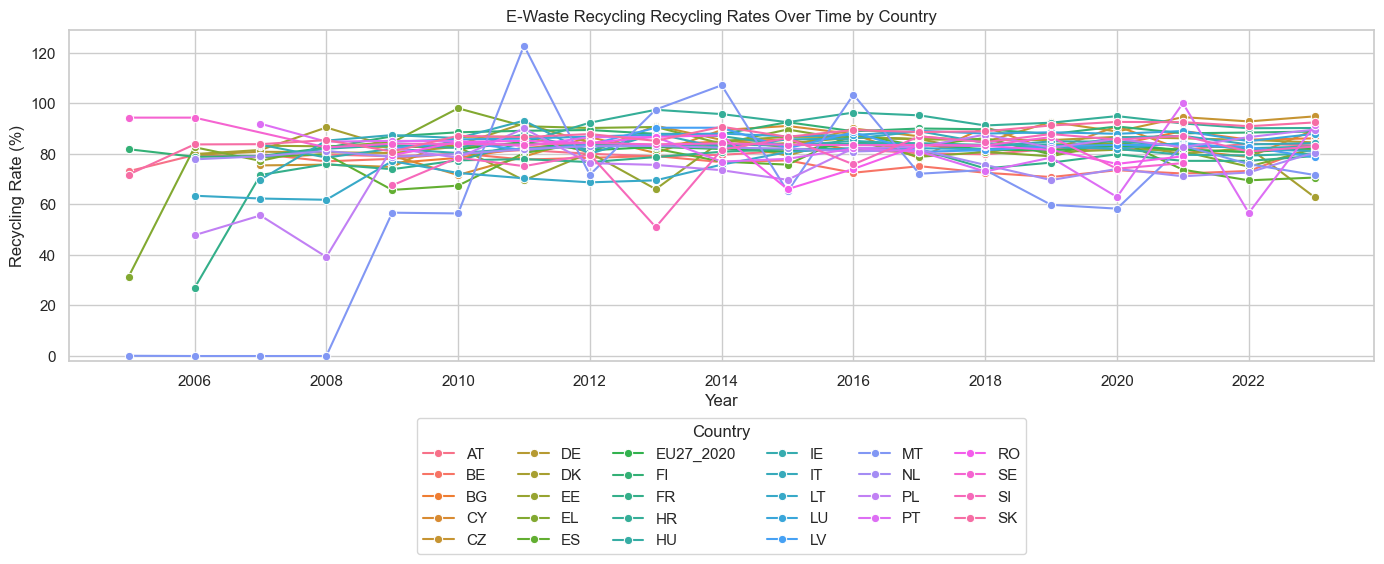

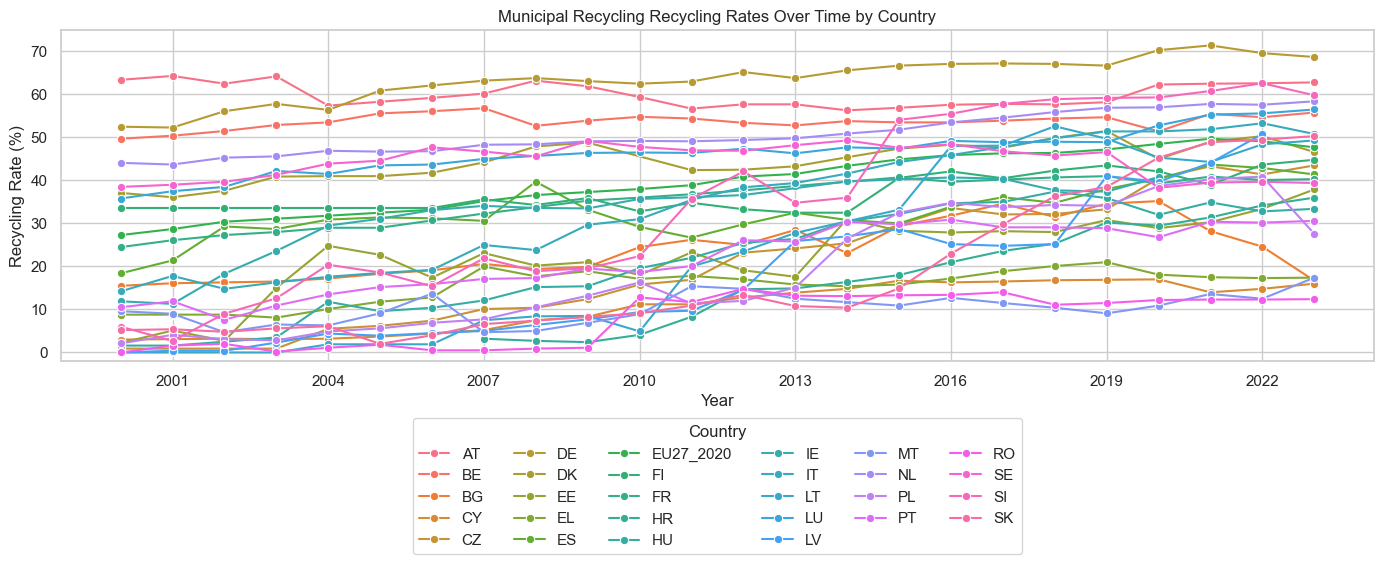

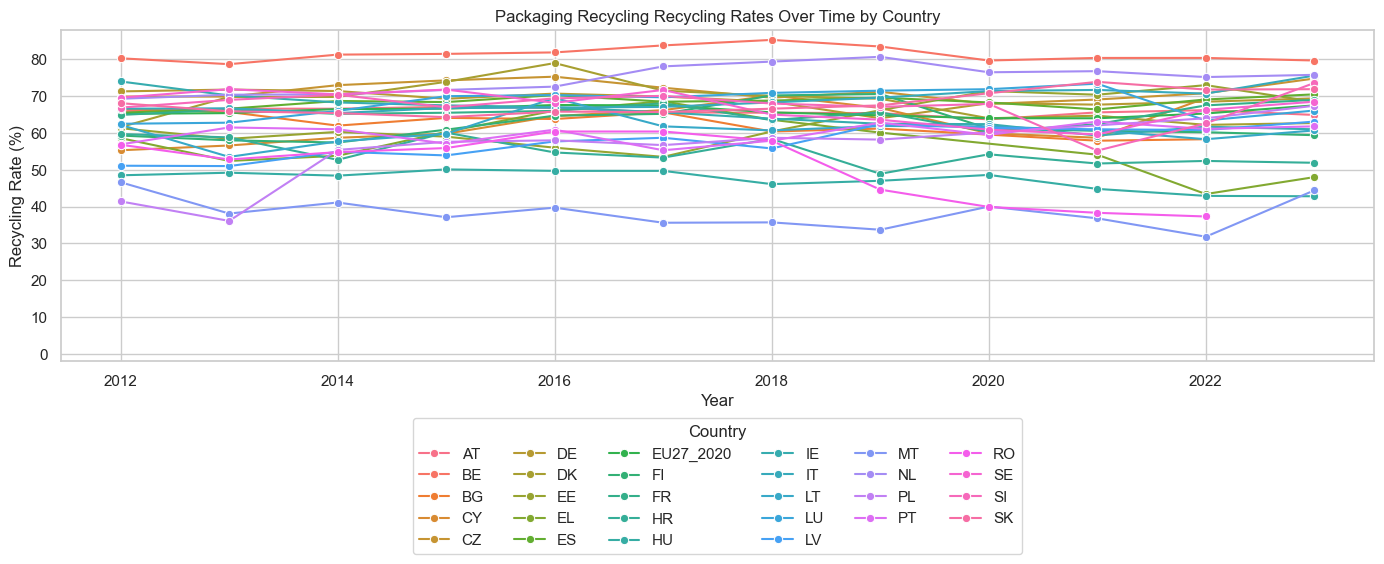

In [52]:
plot_each_country('ewaste', 'E-Waste Recycling')
plot_each_country('municipal', 'Municipal Recycling')
plot_each_country('packaging', 'Packaging Recycling')

| Metric | Typical Range | Trend | Stability |
| :--- | :--- | :--- | :--- |
| **Municipal** | 10% – 70% | Consistent Growth | High |
| **Packaging** | 40% – 85% | Stagnant / Fluctuating | Moderate |
| **E-Waste** | 60% – 100%+ | High but Volatile | Low (Data Outliers) |

TODO: find out why 100+ percentage.

In [53]:
def plot_mean_std(metric_col: str, title: str):
    """
    Plot yearly mean ±1 std across EU countries (excl. EU27_2020) for the given metric column.
    """
    df_plot = df_final.reset_index().query("geo != 'EU27_2020'").copy()
    df_plot["TIME_PERIOD"] = df_plot["TIME_PERIOD"].astype("Int64")

    stats = (
        df_plot.groupby("TIME_PERIOD")[metric_col]
        .agg(["mean", "std"])
        .reset_index()
    )
    stats['EU27_2020'] = df_final.reset_index().query("geo == 'EU27_2020'")[['TIME_PERIOD', metric_col]].set_index('TIME_PERIOD')[metric_col].values


    plt.figure(figsize=(10, 5))
    sns.lineplot(data=stats, x="TIME_PERIOD", y="mean", marker="o", color="blue", label="Mean")
    sns.lineplot(data=stats, x="TIME_PERIOD", y="EU27_2020", marker="o", color="red", label="EU27_2020")
    plt.fill_between(
        stats["TIME_PERIOD"],
        stats["mean"] - stats["std"],
        stats["mean"] + stats["std"],
        color="blue",
        alpha=0.2,
        label="±1 std"
    )
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Recycling Rate (%)")
    plt.legend()
    plt.tight_layout()
    plt.show()


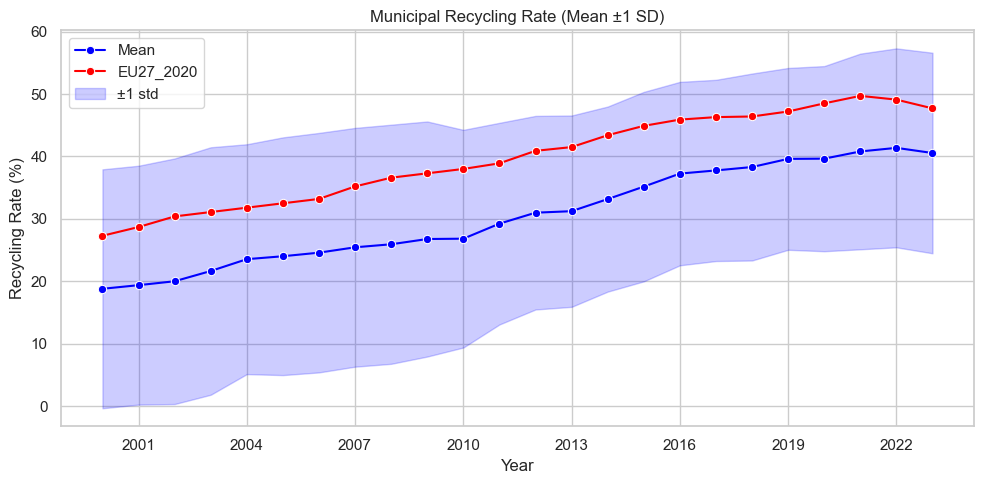

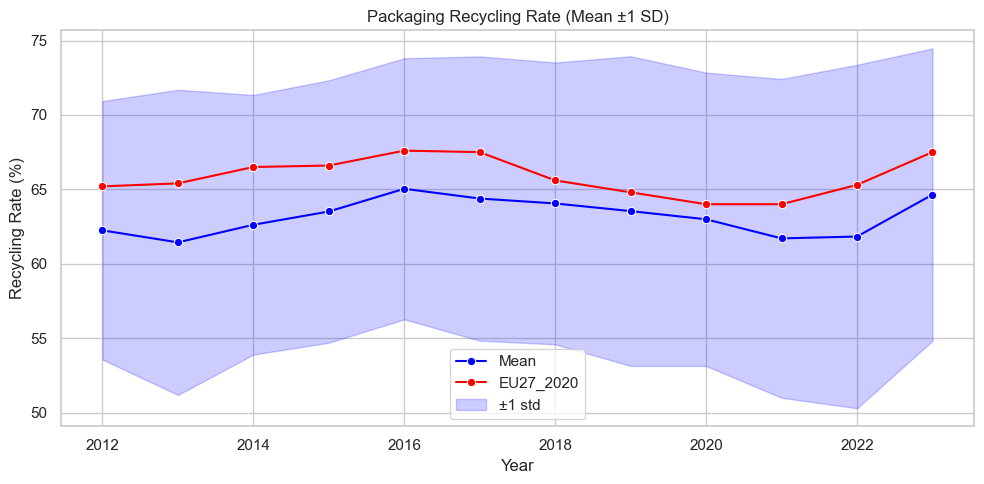

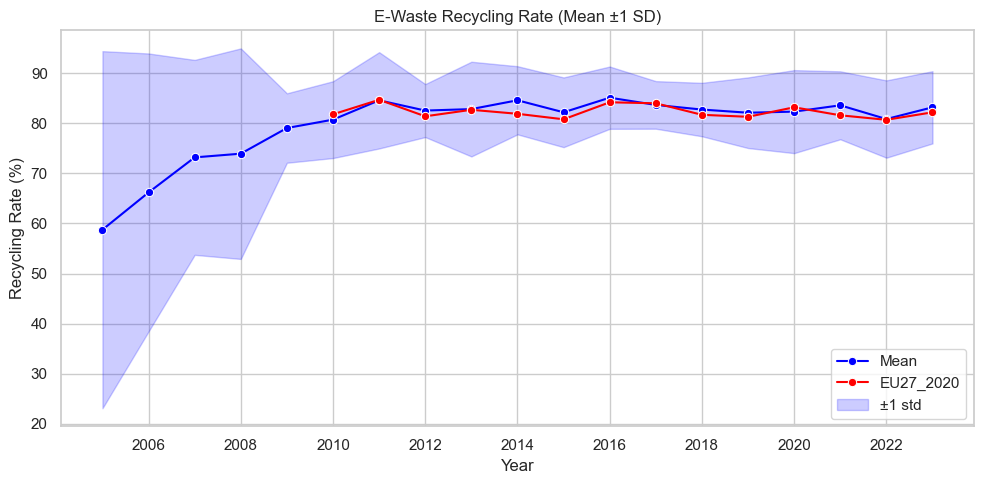

In [54]:
plot_mean_std("recycling_rate_municipal_pc", "Municipal Recycling Rate (Mean ±1 SD)")
plot_mean_std("recycling_rate_packaging_pc", "Packaging Recycling Rate (Mean ±1 SD)")
plot_mean_std("recycling_rate_ewaste_pc", "E-Waste Recycling Rate (Mean ±1 SD)")

# Potential biases of the analysis

# How has the amount of recycling of waste developed in the EU overall over time?


To answer this question comprehensively, we analyze the **EU27_2020 aggregate** (representing the 27-member European Union in its current composition) along two key dimensions:

1. **Efficiency (Recycling Rates in %)**: How effectively is waste being recycled? We examine three waste streams:
   - **Municipal Waste**: Household and similar commercial waste
   - **Packaging Waste**: Materials like paper, glass, metal, and plastic packaging
   - **E-Waste**: Electronic equipment waste (treatment efficiency of collected devices)

2. **Absolute Volume (Mass in Tonnes)**: What is the actual composition of waste treatment? We track:
   - **Recycling** (material recovery + composting) – most desirable
   - **Energy Recovery** (incineration with heat/electricity generation) – recovery operation
   - **Incineration** (without energy recovery) – disposal
   - **Landfill** – least desirable disposal method

**Important Note**: In 2020, the EU implemented a **stricter measurement methodology** (marked by the red line in the visualization). Recycling rates are now measured at the "input" to final recycling facilities rather than at sorting facility "output", providing a more accurate picture of actual recycling performance.



In [58]:
df_eu27 = df_final.loc['EU27_2020']

print("DF Final for EU27_2020:")
#display(df_eu27)
df_eu27.to_csv('./data/df_eu27_2020.csv', index=True)

DF Final for EU27_2020:


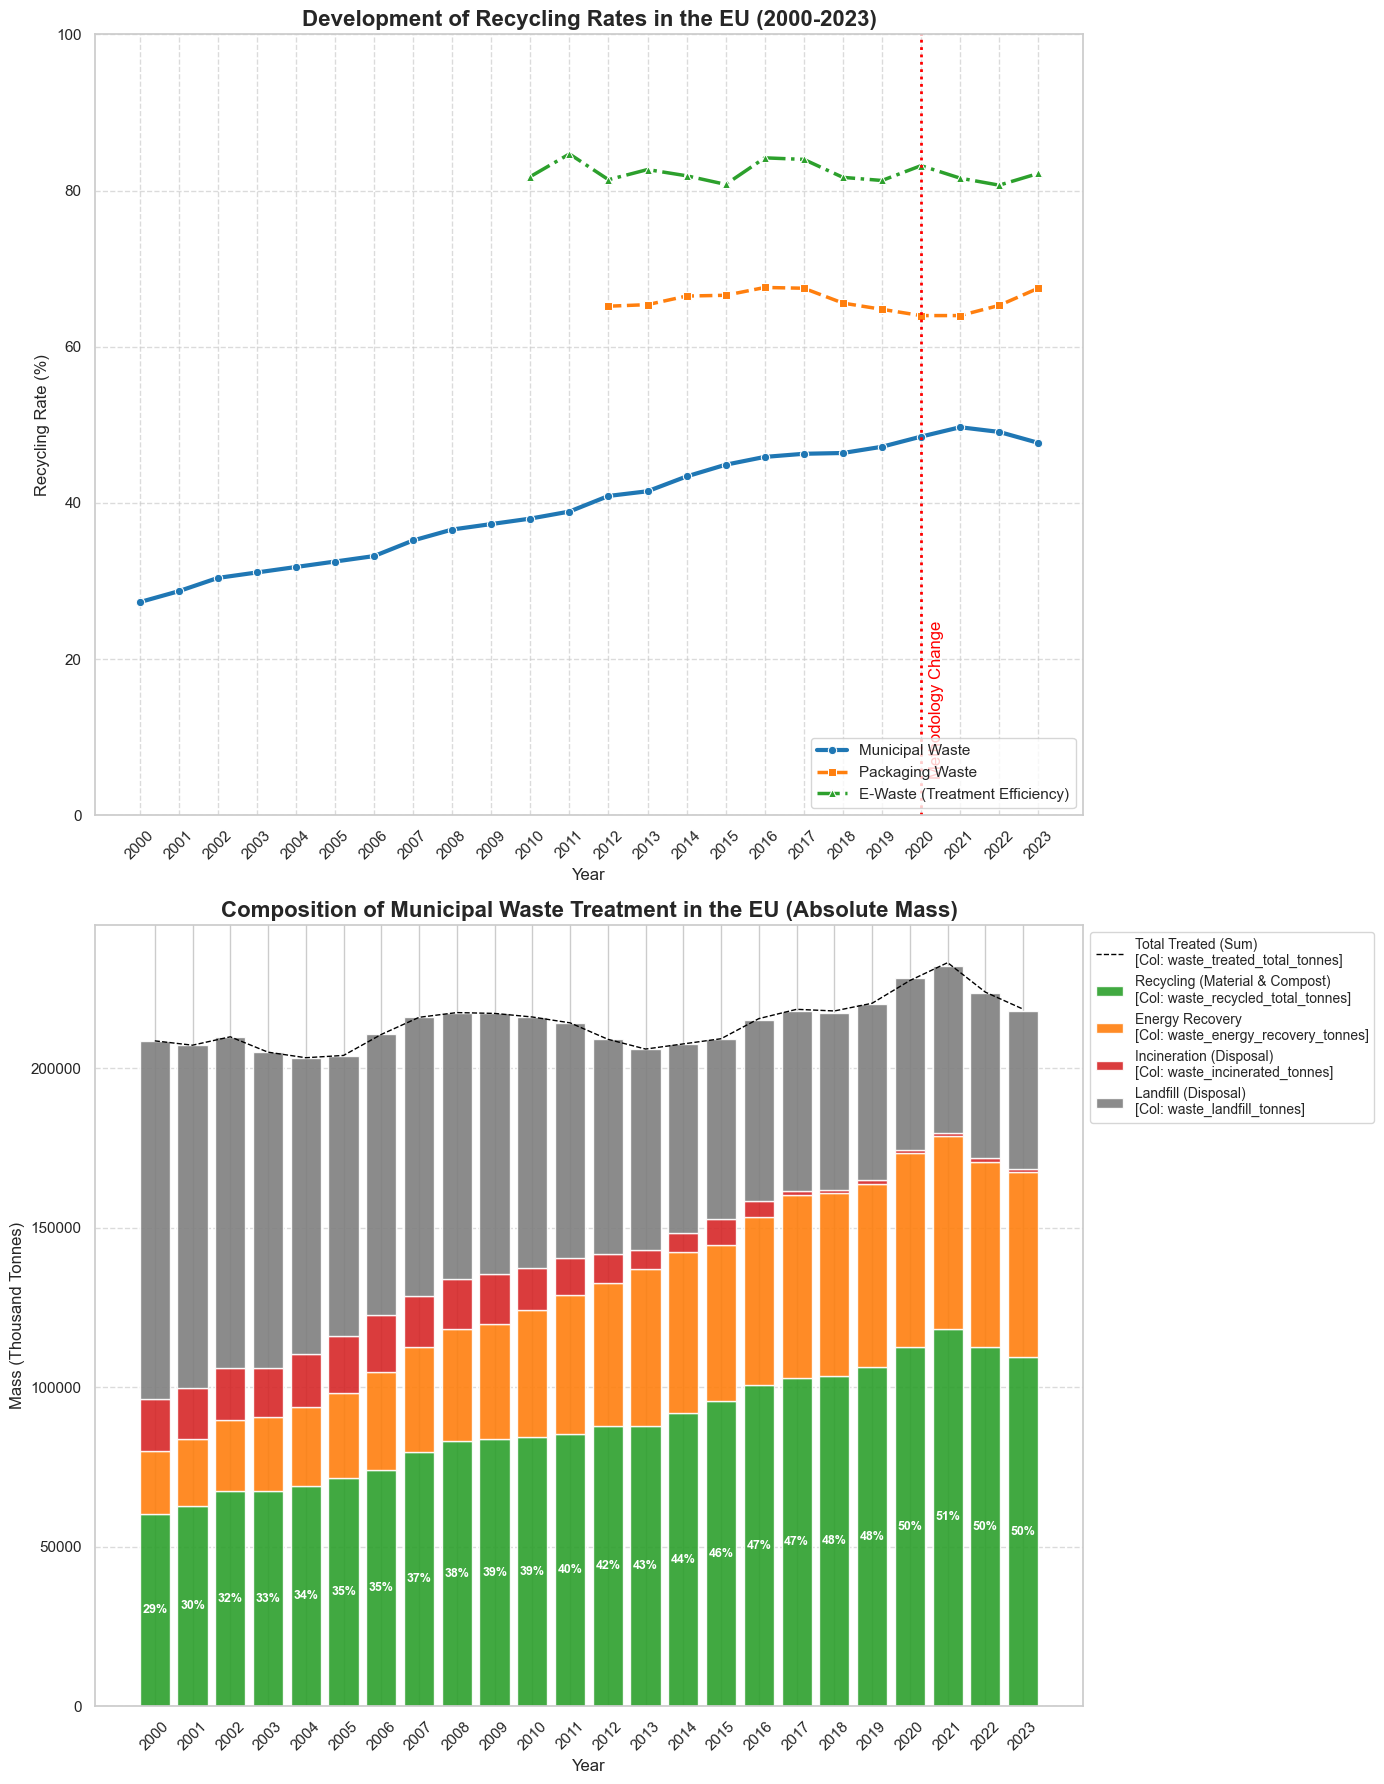

In [59]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract data (if not already done)
# We use .copy() to avoid warnings
df_eu27 = df_final.loc['EU27_2020'].copy()

# 2. Setup
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 18)) # Slightly taller to accommodate the legend

# ==============================================================================
# PLOT 1: RECYCLING RATES (%)
# ==============================================================================
sns.lineplot(ax=axes[0], data=df_eu27, x=df_eu27.index, y='recycling_rate_municipal_pc', 
             label='Municipal Waste', color='#1f77b4', linewidth=3, marker='o')

sns.lineplot(ax=axes[0], data=df_eu27, x=df_eu27.index, y='recycling_rate_packaging_pc', 
             label='Packaging Waste', color='#ff7f0e', linewidth=2.5, linestyle='--', marker='s')

sns.lineplot(ax=axes[0], data=df_eu27, x=df_eu27.index, y='recycling_rate_ewaste_pc', 
             label='E-Waste (Treatment Efficiency)', color='#2ca02c', linewidth=2.5, linestyle='-.', marker='^')

# Formatting Plot 1
axes[0].set_title('Development of Recycling Rates in the EU (2000-2023)', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Recycling Rate (%)', fontsize=12)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylim(0, 100)
axes[0].legend(loc='lower right', fontsize=11, frameon=True)
axes[0].grid(True, linestyle='--', alpha=0.7)

# X-Axis: Show every year
axes[0].set_xticks(df_eu27.index)
axes[0].set_xticklabels(df_eu27.index, rotation=45)

# Line for methodology change
axes[0].axvline(x=2020, color='red', linestyle=':', linewidth=2)
axes[0].text(2020.2, 5, 'Methodology Change', color='red', rotation=90)


# ==============================================================================
# PLOT 2: TOTAL WASTE COMPOSITION (Stacked Bar)
# ==============================================================================
years = df_eu27.index

# Assign columns
rec = df_eu27['waste_recycled_total_tonnes']
energy = df_eu27['waste_energy_recovery_tonnes']
incineration = df_eu27['waste_incinerated_tonnes']
landfill = df_eu27['waste_landfill_tonnes']
total_treated = df_eu27['waste_treated_total_tonnes']

# Stacking (Recycling at bottom) - NOW WITH COLUMN NAMES IN LEGEND
p1 = axes[1].bar(years, rec, 
                 label='Recycling (Material & Compost)\n[Col: waste_recycled_total_tonnes]', 
                 color='#2ca02c', alpha=0.9, edgecolor='white')

p2 = axes[1].bar(years, energy, bottom=rec, 
                 label='Energy Recovery\n[Col: waste_energy_recovery_tonnes]', 
                 color='#ff7f0e', alpha=0.9, edgecolor='white')

bottom_inc = rec + energy
p3 = axes[1].bar(years, incineration, bottom=bottom_inc, 
                 label='Incineration (Disposal)\n[Col: waste_incinerated_tonnes]', 
                 color='#d62728', alpha=0.9, edgecolor='white')

bottom_land = bottom_inc + incineration
p4 = axes[1].bar(years, landfill, bottom=bottom_land, 
                 label='Landfill (Disposal)\n[Col: waste_landfill_tonnes]', 
                 color='#7f7f7f', alpha=0.9, edgecolor='white')

# Total line
axes[1].plot(years, total_treated, color='black', linestyle='--', linewidth=1, 
             label='Total Treated (Sum)\n[Col: waste_treated_total_tonnes]')

# Percentage labels in the green recycling bar
for i, (bar_rec, total) in enumerate(zip(rec, total_treated)):
    if pd.notna(bar_rec) and pd.notna(total) and total > 0:
        pct = (bar_rec / total) * 100
        if bar_rec > 5000: 
            axes[1].text(years[i], bar_rec / 2, f'{pct:.0f}%', 
                         ha='center', va='center', color='white', fontsize=9, fontweight='bold')

# Formatting Plot 2
axes[1].set_title('Composition of Municipal Waste Treatment in the EU (Absolute Mass)', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Mass (Thousand Tonnes)', fontsize=12)
axes[1].set_xlabel('Year', fontsize=12)

# Move legend outside to make text readable
axes[1].legend(loc='upper left', fontsize=10, frameon=True, bbox_to_anchor=(1, 1))

axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# X-Axis: Show every year
axes[1].set_xticks(years)
axes[1].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()





## Analysis of Results

### 1. Development of Recycling Rates (Top Chart)

#### Municipal Waste (Blue Line)
- **Trend**: Consistent improvement from **27.3% (2000) → 47.2% (2019) → 49.7% (2023)**
- **Key Achievement**: Despite the stricter measurement methodology introduced in 2020, recycling rates remained stable, demonstrating that EU recycling infrastructure is genuinely robust
- **Current Status**: The EU has nearly doubled its municipal waste recycling rate over 23 years, approaching the 50% milestone
- **Challenge**: Growth has plateaued around 49-50%, indicating that further improvements require technological innovation for difficult-to-recycle materials and contaminated waste streams

#### Packaging Waste (Orange Dashed Line)
- **Trend**: Consistently high performance at **64-67% (2012-2023)**
- **Why Higher?**: Packaging materials (paper, glass, metal, aluminum) are:
  - More homogeneous and easier to separate
  - Economically valuable, creating strong market incentives
  - Subject to strict EU Packaging Directive targets
- **Interpretation**: This represents a **mature recycling market** where infrastructure and economics align effectively

#### E-Waste (Green Dash-Dot Line)
- **Trend**: Excellent treatment efficiency at **80%+ (2010-2023)**
- **Critical Caveat**: This metric measures **treatment efficiency** of collected e-waste, NOT the collection rate
- **Real Picture**: While facilities successfully recover 80%+ of e-waste they receive, only ~40-50% of end-of-life electronics are actually collected in the first place
- **Implication**: Significant volumes of valuable materials (rare earths, precious metals) are still lost through informal disposal channels

---

### 2. Composition of Waste Treatment (Bottom Chart)

#### The Big Picture: Structural Transformation
The EU has fundamentally shifted from a **disposal-based model** to a **recovery-based model**:

| Year | Recycling (Green) | Recovery Total* | Disposal (Red+Grey) |
|------|---|---|---|
| **2000** | 29% | 39% | 61% |
| **2023** | 50% | 75% | 25% |

*Recovery = Recycling + Energy Recovery

#### Key Trends by Treatment Method

**Recycling (Green Bar) – DOUBLING SUCCESS**
- **Growth**: ~60 million tonnes (2000) → ~119 million tonnes (2023)
- **What This Means**: The EU is processing **twice as much recycled material** compared to 2000
- **Drivers**:
  - Improved collection systems (separate bins, deposit schemes)
  - Expansion of materials accepted (now includes many plastics and organics)
  - Population growth and increased waste generation

**Landfill (Grey Bar) – COLLAPSE**
- **Decline**: ~112 million tonnes (2000) → ~55 million tonnes (2023) = **51% reduction**
- **Significance**: This is the most important environmental achievement—diverting waste from permanent burial
- **Driver**: EU Landfill Directive (1999) set strict reduction targets, forcing member states to invest in alternatives
- **Remaining Challenge**: 25% of waste is still landfilled; the EU target for 2035 is ≤10%

**Energy Recovery (Orange Bar) – RISE**
- **Growth**: ~20 million tonnes (2000) → ~57 million tonnes (2023)
- **Classification**: Considered a **recovery operation** (not disposal) under EU law because energy is extracted
- **Technology**: Modern waste-to-energy plants with district heating systems (common in Nordic countries)

**Incineration without Energy Recovery (Red Bar) – NEAR ELIMINATION**
- **Decline**: ~16 million tonnes (2000) → ~1 million tonnes (2023)
- **Reason**: EU Best Available Techniques (BAT) standards now require energy recovery systems on incineration facilities

**Total Treated Waste (Black Dashed Line) – SLIGHT GROWTH**
- **Trend**: ~209 million tonnes (2000) → ~227 million tonnes (2023) = +9%
- **Interpretation**: Total waste volume has NOT significantly decreased despite circular economy efforts
- **Success Metric**: The composition has shifted dramatically toward recovery rather than disposal

---


# Usage of LLMs
- Github CoPilot for coding support

# Data Science tools and techniques learned during this exercise

# Distribution of Work